# Проектная работа

<br><br>
**Описание работы:**

Передо мной стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета нужно оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее нужно посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где мне необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. На конечном этапе, необходимо разработать метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа необходимо сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.patches as mpatches

In [5]:
#загружаю данные из файлов
data_courses = pd.read_csv('data/courses.csv')
data_course_contents = pd.read_csv('data/course_contents.csv')
data_progresses = pd.read_csv('data/progresses.csv')
data_progress_phases = pd.read_csv('data/progress_phases.csv')
data_students = pd.read_csv('data/students.csv')

In [6]:
#объединяю данные в один датасет
main = data_progress_phases.merge(data_progresses, left_on='progress_id', right_on='id')
del main['id']#удаляю столбец, чтобы избежать дублирования столбцов
main = main.merge(data_courses, left_on='course_id', right_on='id')
main = main.drop(['id', 'Unnamed: 0'], axis=1)# удаляю ненужные столбцы
main = main.merge(data_course_contents)
#переименовываю столбцы, чтобы понимать к какому набору данных они относятся
main.rename(columns = {'title' : 'course_title', 'field' : 'course_field'}, inplace = True)
main.head(1)

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   

                      start_date                    finish_date  \
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   

                         student_id                         course_id  \
0  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   

         course_title course_field           module_title       lesson_title  \
0  Веб-дизайн PRO 2.0       Design  Концептуальный дизайн  Практика — мокапы   

                           lesson_token  is_video  is_homework  
0  7df8adef-1259-4b72-9bf2-353c73389d06      True        False

In [7]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf']# проверка основного датасета

progress_id  module_number  lesson_number status  \
0       a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1       a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2       a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
3       a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
4       a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   
5       a387ab916f402cb3fbfffd29f68fd0ce              2              1   done   
6       a387ab916f402cb3fbfffd29f68fd0ce              1              3   done   
7       a387ab916f402cb3fbfffd29f68fd0ce              2              5  start   
8       a387ab916f402cb3fbfffd29f68fd0ce              1              2   done   
9       a387ab916f402cb3fbfffd29f68fd0ce              1              5   done   
10      a387ab916f402cb3fbfffd29f68fd0ce              2              3   done   
112420  6407c290505e790e92207a1dbc41a2cd              1              1  start   
132870  5767046d89ed7563a0c3a9a3896a23e6              1              3   done   
132871  5767046d89ed7563a0c3a9a3896a23e6              2              2   done   
132872  5767046d89ed7563a0c3a9a3896a23e6              1              1   done   
132873  5767046d89ed7563a0c3a9a3896a23e6              1              2   done   
132874  5767046d89ed7563a0c3a9a3896a23e6              2              1   done   
132875  5767046d89ed7563a0c3a9a3896a23e6              2              3   fail   
155020  c90ebe1431eac5cbb11692100b7a0f8d              1              3   done   
155021  c90ebe1431eac5cbb11692100b7a0f8d              1              1   done   
155022  c90ebe1431eac5cbb11692100b7a0f8d              1              7  start   
155023  c90ebe1431eac5cbb11692100b7a0f8d              1              5   done   
155024  c90ebe1431eac5cbb11692100b7a0f8d              1              6   done   
155025  c90ebe1431eac5cbb11692100b7a0f8d              1              4   done   
155026  c90ebe1431eac5cbb11692100b7a0f8d              1              2   done   

                           start_date                    finish_date  \
0       2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   
1       2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00   
2       2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00   
3        2018-06-20 16:00:06.36178+00  2018-06-21 19:09:30.845034+00   
4       2018-06-21 19:10:36.957891+00  2018-06-28 15:59:25.320418+00   
5       2018-06-23 08:18:07.476199+00  2018-06-23 08:18:09.552181+00   
6       2018-06-20 15:58:22.132468+00  2018-06-20 16:00:06.127191+00   
7       2018-06-23 08:31:00.338883+00                            NaN   
8       2018-06-20 15:45:07.976223+00  2018-06-20 15:58:21.886722+00   
9       2018-06-21 19:09:31.117521+00  2018-06-21 19:10:36.707919+00   
10      2018-06-23 08:18:12.890698+00  2018-06-23 08:28:50.564437+00   
112420  2018-06-20 14:25:13.010259+00                            NaN   
132870  2018-02-19 12:32:35.928905+00  2018-02-20 09:16:36.741375+00   
132871  2018-02-22 08:57:31.008346+00  2018-04-28 13:45:40.708228+00   
132872         2018-01-13 15:20:23+00         2018-01-13 15:20:23+00   
132873         2018-01-13 15:20:23+00         2018-01-14 13:47:25+00   
132874  2018-02-22 08:54:10.987784+00  2018-02-22 08:57:30.914939+00   
132875  2018-04-28 13:45:40.955076+00                            NaN   
155020  2018-06-19 15:08:14.103923+00  2018-06-19 15:39:53.661163+00   
155021  2018-06-19 10:40:05.063485+00  2018-06-19 14:56:16.346353+00   
155022  2018-06-19 18:40:00.576904+00                            NaN   
155023  2018-06-19 18:10:52.316728+00  2018-06-19 18:35:38.720317+00   
155024  2018-06-19 18:35:38.884217+00  2018-06-19 18:37:11.155066+00   
155025  2018-06-19 15:39:53.923777+00    2018-06-19 18:10:52.1737+00   
155026  2018-06-19 14:56:16.570129+00  2018-06-19 15:08:13.930725+00   

                              student_id         

<Axes: >

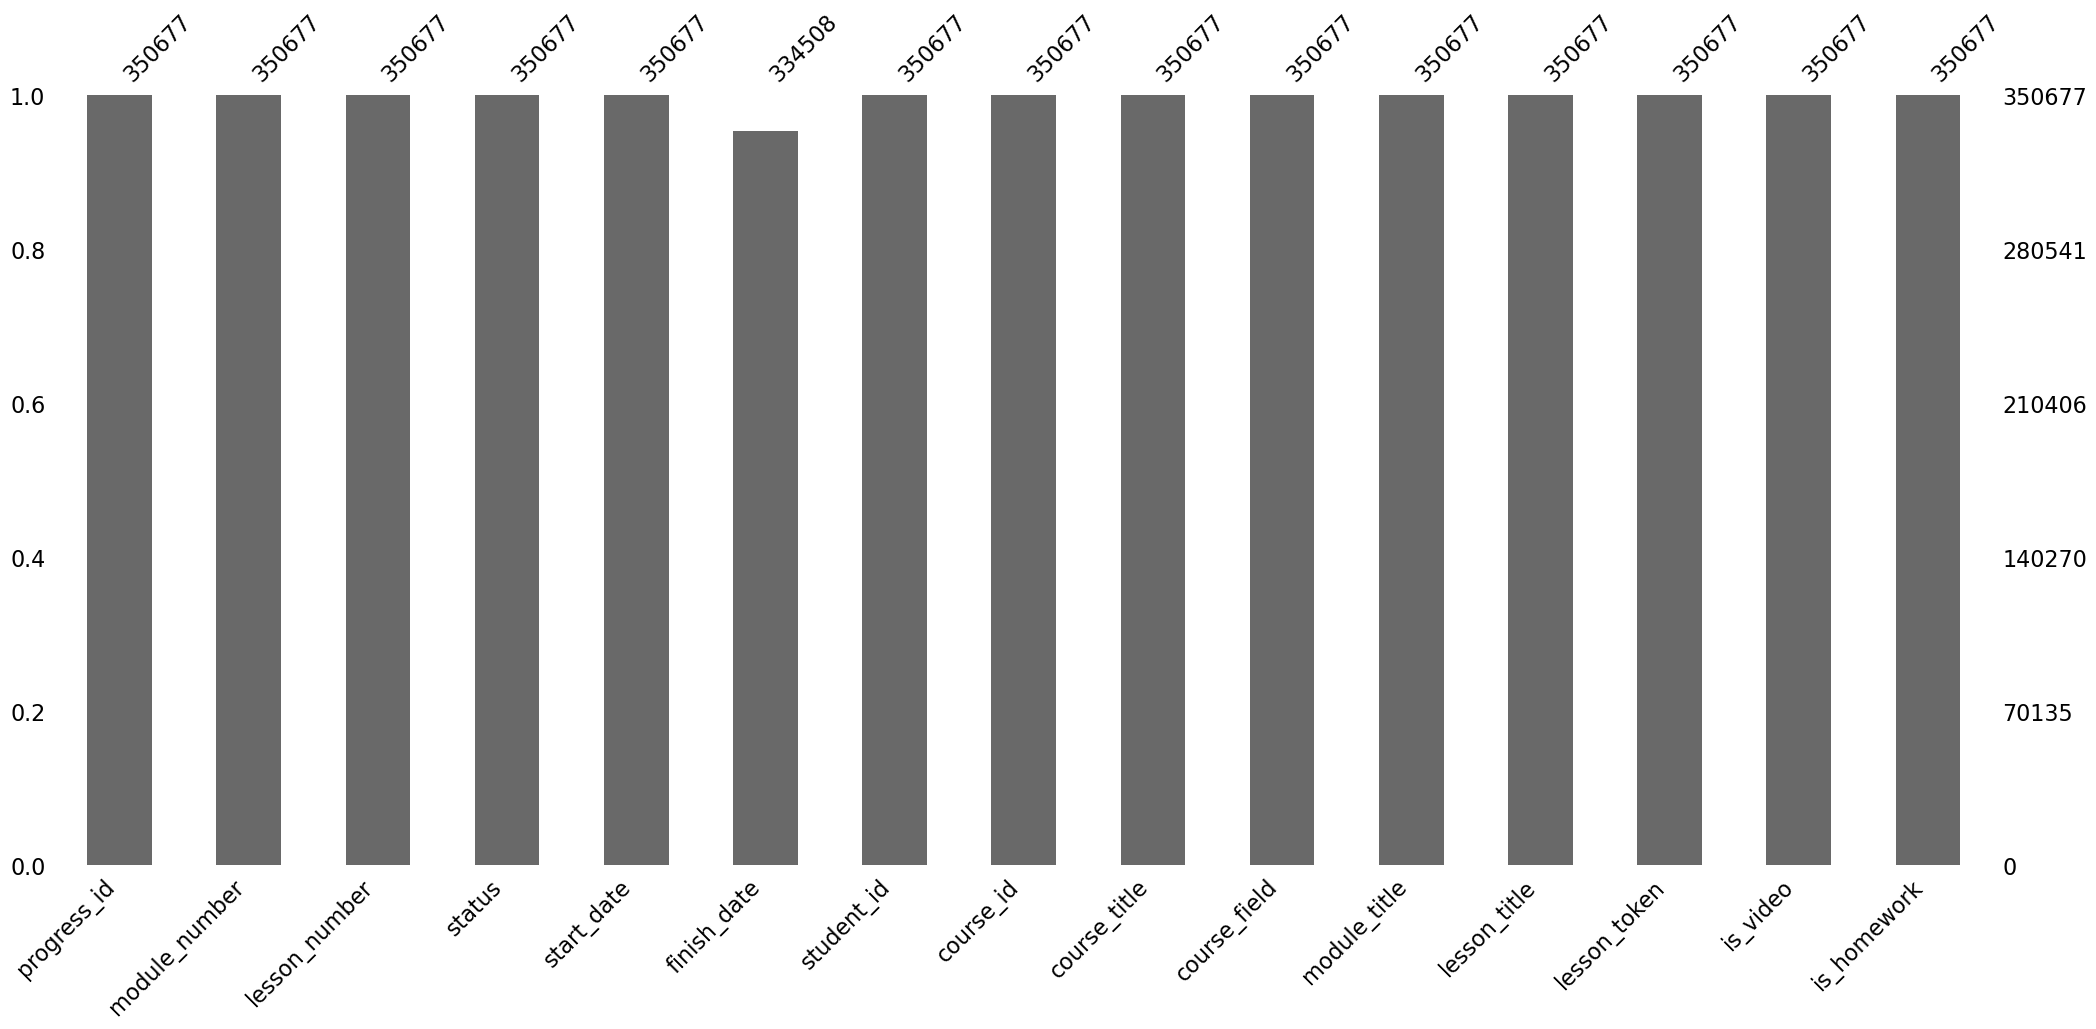

In [8]:
### YOUR CODE HERE ###
msno.bar(main)

Анализ показывает, что 16169 или около 4,6% значений в столбце finish_date имеют пропущенное значение. 
Скорее всего модуль еще не был закончен на этапе сбора информации. 

In [10]:
# считаю количество курсов в датасете
count_courses = len(list(main.groupby('course_id')))#15

In [11]:
# считаю количество модулей на каждом курсе
count_modules = main.groupby('course_title').agg(module_count = ('module_number','max'))
count_modules

module_count
course_title                                     
Excel Базовый                                   9
Java-разработчик                               17
Java-разработчик c нуля                         9
JavaScript с нуля                              18
PHP-разработчик с 0 до PRO. Часть 1             8
SMM-маркетолог от А до Я                       11
UX-дизайн                                      20
Анимация интерфейсов                           21
Веб-вёрстка для начинающих 2.0                  8
Веб-дизайн PRO 2.0                             17
Веб-дизайн Базовый                             17
Веб-дизайн с нуля 2.0                          19
Веб-разработчик                                20
Интернет-маркетолог от Ingate                  18
Руководитель digital-проектов                  17

In [12]:
# считаю количество уроков в каждом модуле на каждом курсе
count_lessons = main.groupby(['course_title', 'module_title']).agg(lesson_count = ('lesson_number','max'))
count_lessons

lesson_count
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                                     5
                              Основной функционал Excel                                     11
                              Основной функционал Excel (продолжение)                        7
                              Сводные таблицы Excel                                          5
                              Формулы и функции Excel. Более сложные формулы                 5
...                                                                                        ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                              5
                              Требовательность digital-продюсера                             4
                              Управление временем                                            4
                              Управление дизайнерами. Разработка дизайна по s...             7
                              Экологичный путь менеджера                                     4

[229 rows x 1 columns]

In [13]:
# отбираю строку с максимальным числом уроков
count_lessons[count_lessons['lesson_count'] == max(count_lessons['lesson_count'])]

lesson_count
course_title                  module_title                 
Интернет-маркетолог от Ingate Email-маркетинг            29

In [14]:
# считаю медианное количество уроков в модуле на каждом курсе
median_lessons = main.groupby('course_title').agg(lesson_median = ('lesson_number','median'))
median_lessons

lesson_median
course_title                                      
Excel Базовый                                  4.0
Java-разработчик                               4.0
Java-разработчик c нуля                        5.0
JavaScript с нуля                              4.0
PHP-разработчик с 0 до PRO. Часть 1            3.0
SMM-маркетолог от А до Я                       3.0
UX-дизайн                                      3.0
Анимация интерфейсов                           2.0
Веб-вёрстка для начинающих 2.0                 4.0
Веб-дизайн PRO 2.0                             3.0
Веб-дизайн Базовый                             3.0
Веб-дизайн с нуля 2.0                          3.0
Веб-разработчик                                1.0
Интернет-маркетолог от Ingate                  5.0
Руководитель digital-проектов                  3.0

In [15]:
# считаю количество учеников на каждом курсе
count_students = main.groupby('course_title').agg(count_students = ('student_id', 'nunique'))
count_students.sort_values('count_students')

count_students
course_title                                       
SMM-маркетолог от А до Я                        506
Веб-дизайн Базовый                              518
Java-разработчик c нуля                         581
Анимация интерфейсов                            598
Веб-разработчик                                 628
Руководитель digital-проектов                   685
Java-разработчик                                763
Excel Базовый                                   782
PHP-разработчик с 0 до PRO. Часть 1             854
JavaScript с нуля                               966
UX-дизайн                                      1151
Веб-дизайн PRO 2.0                             1711
Веб-вёрстка для начинающих 2.0                 2004
Веб-дизайн с нуля 2.0                          2014
Интернет-маркетолог от Ingate                  2168

In [16]:
# подготавливаю данные для расчета возраста студентов
data_age = data_students[['id', 'birthday']].dropna() # удаляю пустые значения в таблице

# значения в колонке 'birthday' привожу к формату datetime
data_age['birthday'] = pd.to_datetime(data_age['birthday'], errors="coerce") 
#После преобразования, появляются 9 пустых значений, так как дата введена не корректна. 
data_age = data_age.dropna() #Удаляю пустые значения в таблице еще раза, чтобы они не мешали в дальнейшем.

In [17]:
# создаю новую колонку, где расчитываю возраст студентов
from dateutil.relativedelta import relativedelta

def calculate_age(birthday):
    today = pd.Timestamp.today()
    return relativedelta(today, birthday).years

data_age['age'] = data_age['birthday'].apply(calculate_age)
 
# отбираю данные по возрасту (возраст ограничила промежутком от 12 до 65 лет)
data_age = data_age[(data_age['age'] >= 12) & (data_age['age'] <= 65)]

# вычисляю максимальный, минимальный, средний и медианный возраст
print('Максимальный возраст:', data_age['age'].max())
print('Минимальный возраст:', data_age['age'].min())
print('Средний возраст:', data_age['age'].mean())
print('Медианный возраст:', data_age['age'].median())

Максимальный возраст: 65
Минимальный возраст: 13
Средний возраст: 33.552707339196274
Медианный возраст: 33.0


In [18]:
# подготавливаю данные для вычисления возраста студентов на каждом курсе
students = data_progresses.merge(data_age, left_on='student_id', right_on='id').merge(\
                                                                data_courses, left_on='course_id', right_on='id')
students_course = students[['title', 'student_id', 'age']]

#вычисляю максимальный, минимальный, средний и медианный возраст на каждом курсе
students_course.groupby('title')['age'].agg(['max', 'min', 'mean', 'median'])

max  min       mean  median
title                                                           
Excel Базовый                         65   21  38.193694    38.0
Java-разработчик                      59   19  33.786861    33.0
Java-разработчик c нуля               59   18  34.081034    33.0
JavaScript с нуля                     63   18  33.159737    32.0
PHP-разработчик с 0 до PRO. Часть 1   63   18  33.972603    33.0
SMM-маркетолог от А до Я              56   21  33.579477    33.0
UX-дизайн                             62   19  34.699799    34.0
Анимация интерфейсов                  55   19  34.173184    34.0
Веб-вёрстка для начинающих 2.0        63   18  33.179370    32.0
Веб-дизайн PRO 2.0                    63   19  33.028231    32.0
Веб-дизайн Базовый                    55   20  33.138298    32.0
Веб-дизайн с нуля 2.0                 63   18  32.727606    32.0
Веб-разработчик                       55   18  32.697228    32.0
Интернет-маркетолог от Ingate         64   21  35.764927    35.0
Руководитель digital-проектов         59   23  36.119857    36.0

In [19]:
# 1.2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
# подготавливаю данные для построения bar-chart
course = data_progresses.merge(data_courses, left_on = 'course_id', right_on = 'id')
count_studens_course = course.groupby('title').agg('count')

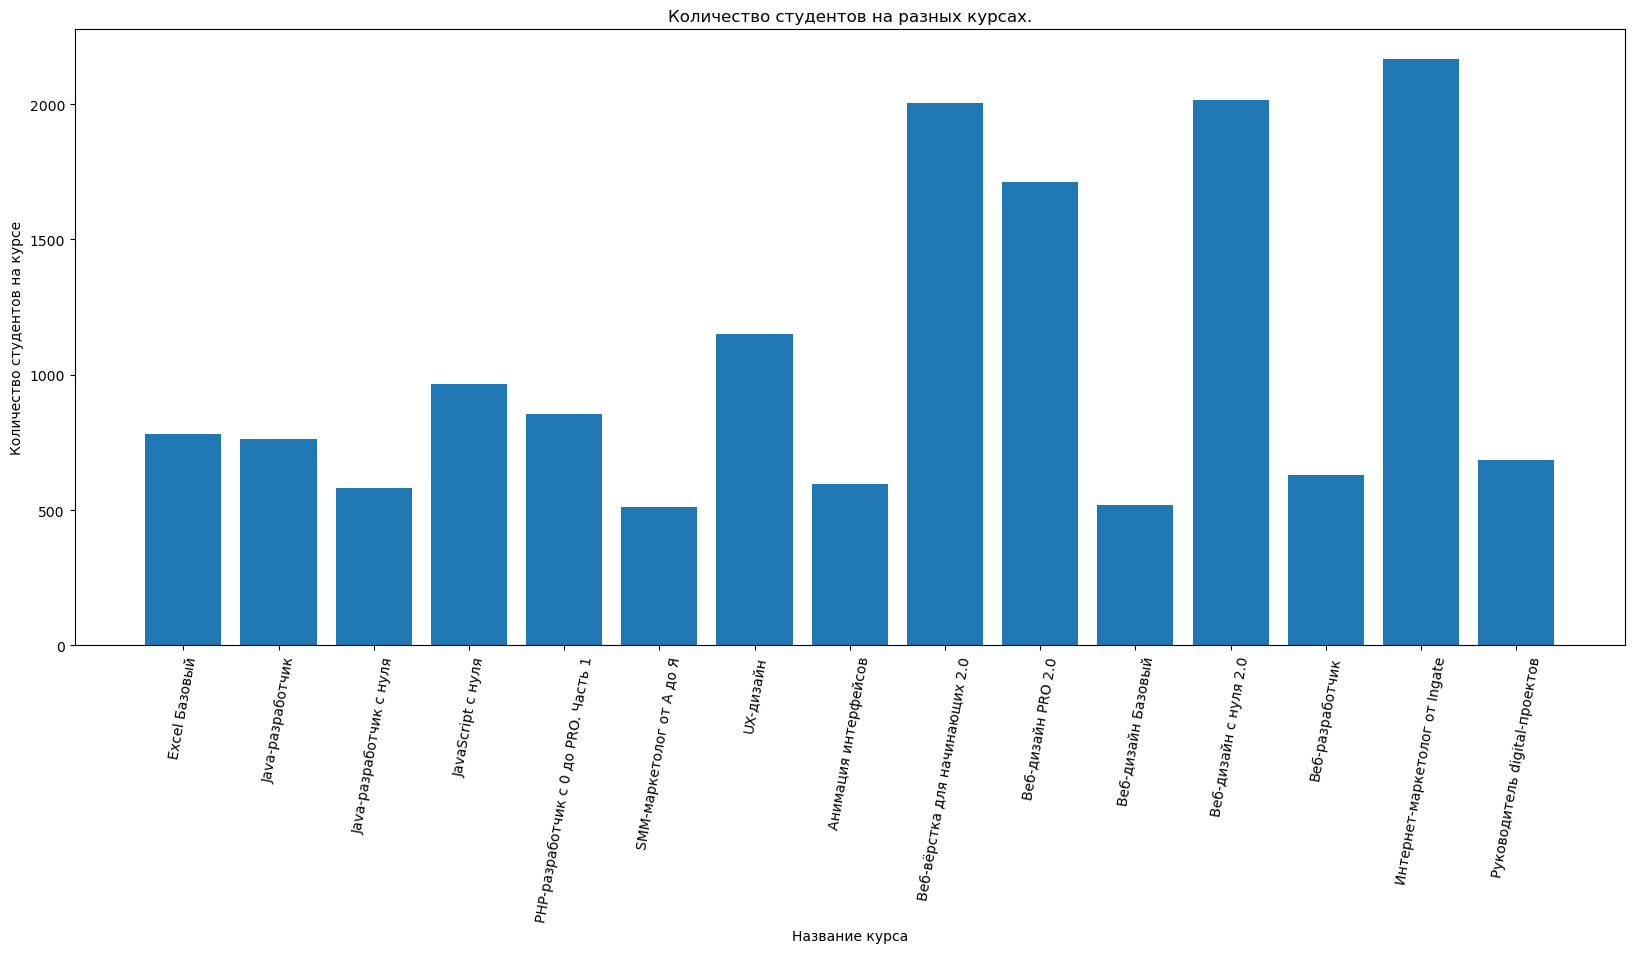

In [20]:
#строю bar-chart
plt.figure(figsize=(20, 8))
plt.bar(count_studens_course.index, count_studens_course['student_id'])

plt.title('Количество студентов на разных курсах.')
plt.xlabel('Название курса')
plt.ylabel('Количество студентов на курсе')
plt.xticks(rotation = 80)

plt.show()

In [21]:
# 1.3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом
# курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере,
# к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена 
# линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

# подготовливаю данные для построения горизонтального bar-chart
data_count = data_courses.merge(count_students, left_on='title', \
                                right_on='course_title').sort_values('count_students')
# создаем новый столбец color по условию столбца field
data_count['color'] = 'green'
data_count.loc[data_count['field']=='Marketing', 'color'] = 'red' 
data_count.loc[data_count['field']=='Design', 'color'] = 'orange' 
data_count.loc[data_count['field']=='Development', 'color'] = 'blue' 

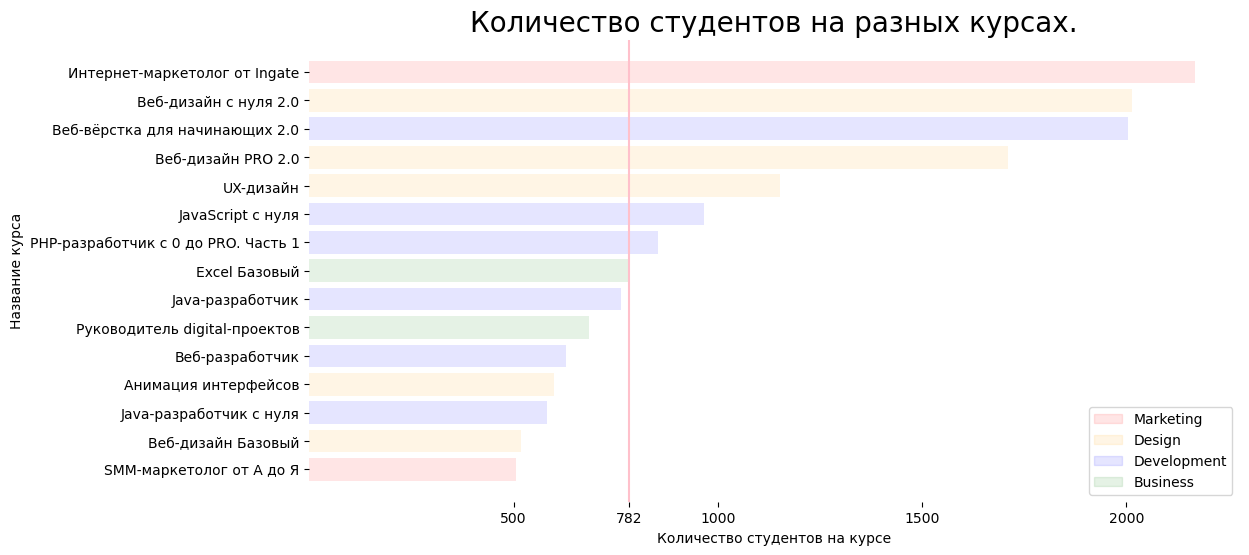

In [22]:
# сторим график
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,6))


ax.barh(data_count['title'], data_count['count_students'], color = data_count['color'], label = data_count['color'], \
        alpha = 0.1)

# подписываю название графика и оси
ax.set_title('Количество студентов на разных курсах.', size = 20)
ax.set_xlabel('Количество студентов на курсе', size = 10)
ax.set_ylabel('Название курса', size = 10)

#формирую легенду
red_patch = mpatches.Patch(color='red', label='Marketing', alpha=0.1)
orange_patch = mpatches.Patch(color='orange', label='Design', alpha=0.1)
blue_patch = mpatches.Patch(color='blue', label='Development', alpha=0.1)
green_patch = mpatches.Patch(color='green', label='Business', alpha=0.1)

plt.legend(handles=[red_patch, orange_patch, blue_patch, green_patch])

#  нахожу медианное значение в столбце count_students
x = data_count['count_students'].median()
ax.axvline(x, color='pink')

# составляю лист меток по оси х
list_ticks = [500, x, 1000, 1500, 2000]
plt.xticks(list_ticks)

# удаляю рамки у графика
plt.box(on = None)

plt.show()

### После подготовки и расчетов данных получаю:
- [ ] Количество курсов в датасете 15.
- [ ] В каждом курсе различное количество модулей от 8 до 21. (Данные подсчитаны в count_modules).
- [ ] В каждом модуле различное число уроков. (Данные подсчитаны в count_lessons). Максимальное количество уроков на курсе Интернет-маркетолог от Ingate в модуле  Email-маркетинг.
- [ ] Максимальное количество учеников на курсе Интернет-маркетолог от Ingate, а минимальное количество студентов на курсе SMM-маркетолог от А до Я.
- [ ] Рассматривая график Количество студентов на разных курсах можно увидеть какие самые востребованные профессии и к какой сфере они относятся. Не смотря на то, что самая востребованная профессия относиться к Marketing, большое количество учеников учится на профессиях которые относятся к Design
- [ ] При анализе дата сета studens получили, что максимальный возраст студентов 65 лет, минимальный возраст студентов 13 лет, средний возраст 33.55 год и медианное значение возраста 33 год.
- [ ] Анализирую полученные данные, можно сделать вывод, что большее количество студентов имеют возраст от 32 до 38 лет. Я думаю, в этом возрасте приходит понимание, чем люди хотят заниматься по жизни. Поэтому они или меняют профессию или приобретают какие-то новые знания.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [25]:
### YOUR CODE HERE ###

# 2.1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до
# июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

# подготовливаю датасет для расчета прироста студентов на каждом курсе
start = data_progress_phases[(data_progress_phases['module_number']==1) & (data_progress_phases['lesson_number']==1)]\
    [['progress_id', 'start_date']]

start_course = start.merge(data_progresses, left_on='progress_id', right_on='id').merge(data_courses,\
    left_on='course_id', right_on='id')[['title', 'student_id', 'start_date']]

# колонку start_date преобразую в формат Datetime
start_course['start_date'] = pd.to_datetime(start_course['start_date'], errors="coerce")

# добавляю новый столбец period, где будет только месяц и год
start_course['period'] = start_course['start_date'].dt.strftime('%Y-%m')

# считаю прирост студентов на каждом курсе в каждом месяце
result_growth = start_course.groupby(['title', 'period']).agg(student_growth = ('student_id', 'count'))
result_growth.head()

student_growth
title         period                 
Excel Базовый 2018-02               5
              2018-03               4
              2018-05               7
              2018-06              39
              2018-07              23

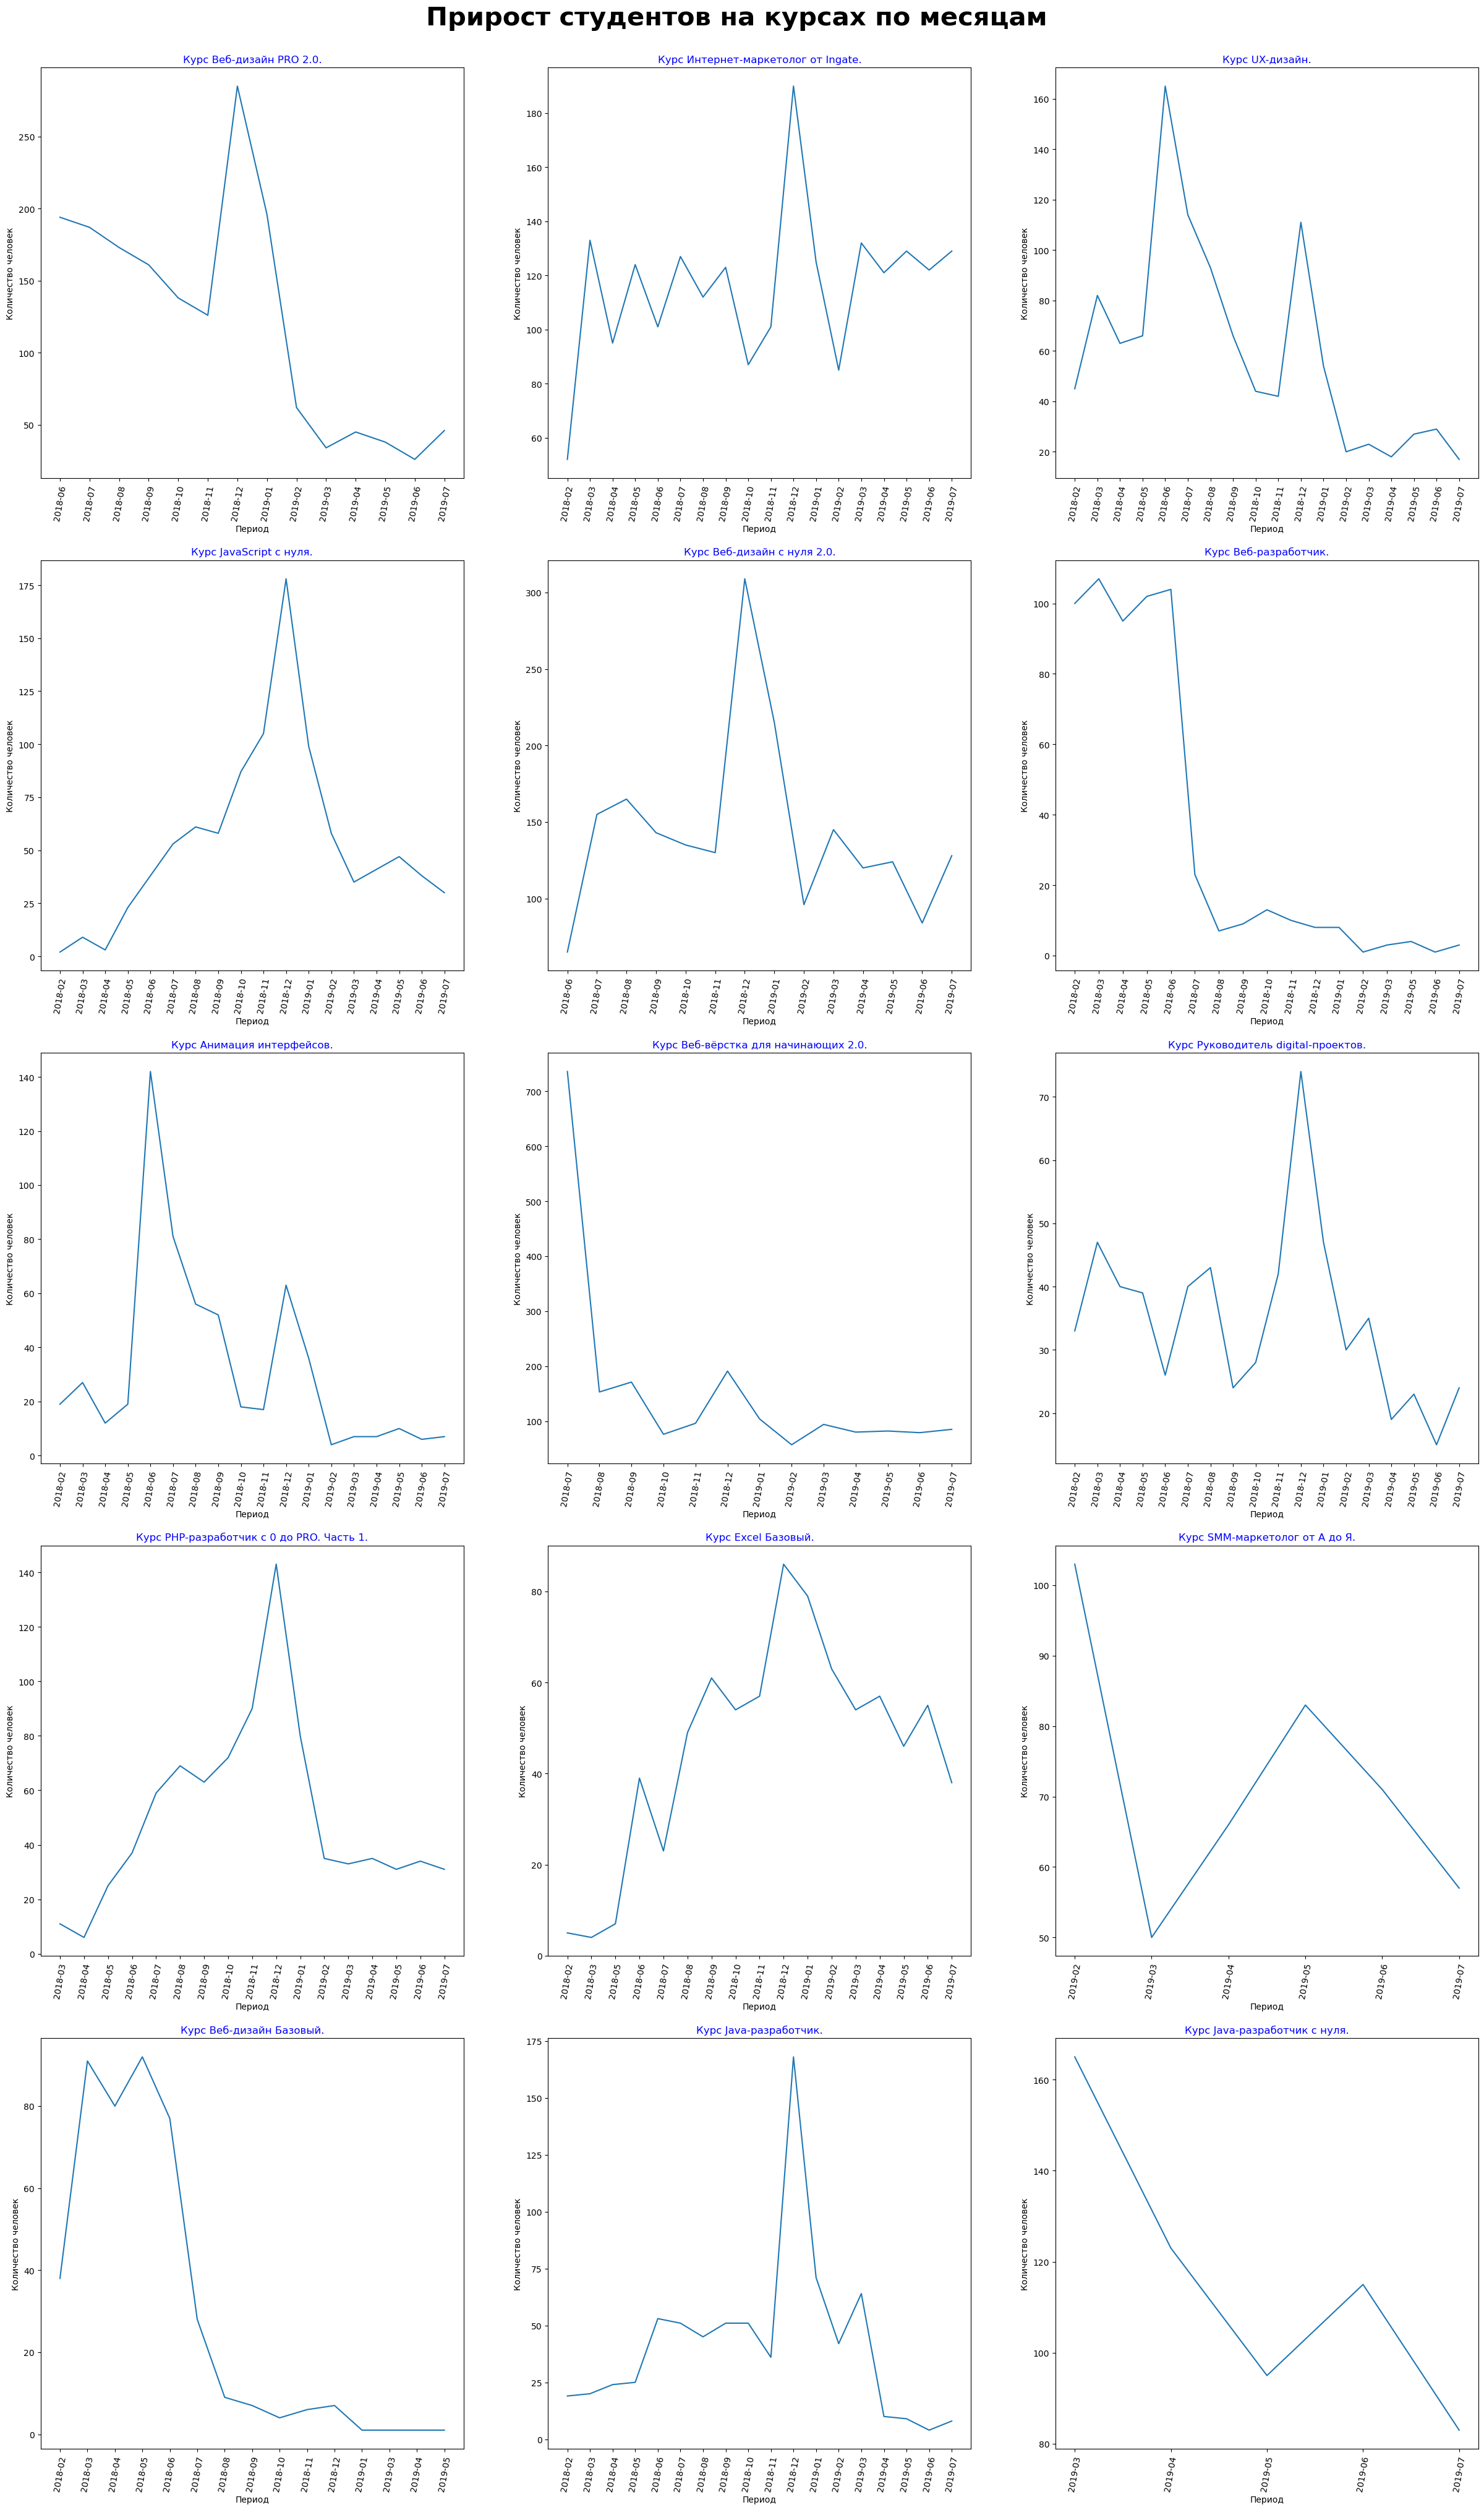

In [26]:
# 2.2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков.
# Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

fig, axs = plt.subplots(figsize = (30, 50), ncols = 3, nrows = 5)

# формирую список с названиями курсов
list_courses = main['course_title'].unique()

# в цикле рисую 15 графиков
i = 0
for x in range(5):
    for y in range(3):
        course = list_courses[i]
        # формирую датасет для курса
        data = start_course[start_course['title']== course].groupby('period').agg\
            (student_growth = ('student_id', 'count'))
        # рисую график для курса
        axs[x][y].plot(data.index, data['student_growth'])
       
        # подписываю все параметры для графика
        axs[x][y].set_title(f'Курс {course}.', color='blue')
        axs[x][y].set_ylabel('Количество человек')
        axs[x][y].set_xlabel('Период')
        axs[x][y].set_xticks(data.index)
        axs[x][y].xaxis.set_tick_params(rotation = 80)
        i += 1

fig.suptitle('Прирост студентов на курсах по месяцам', y = 0.9, fontsize= 30, fontweight='bold')

plt.show()

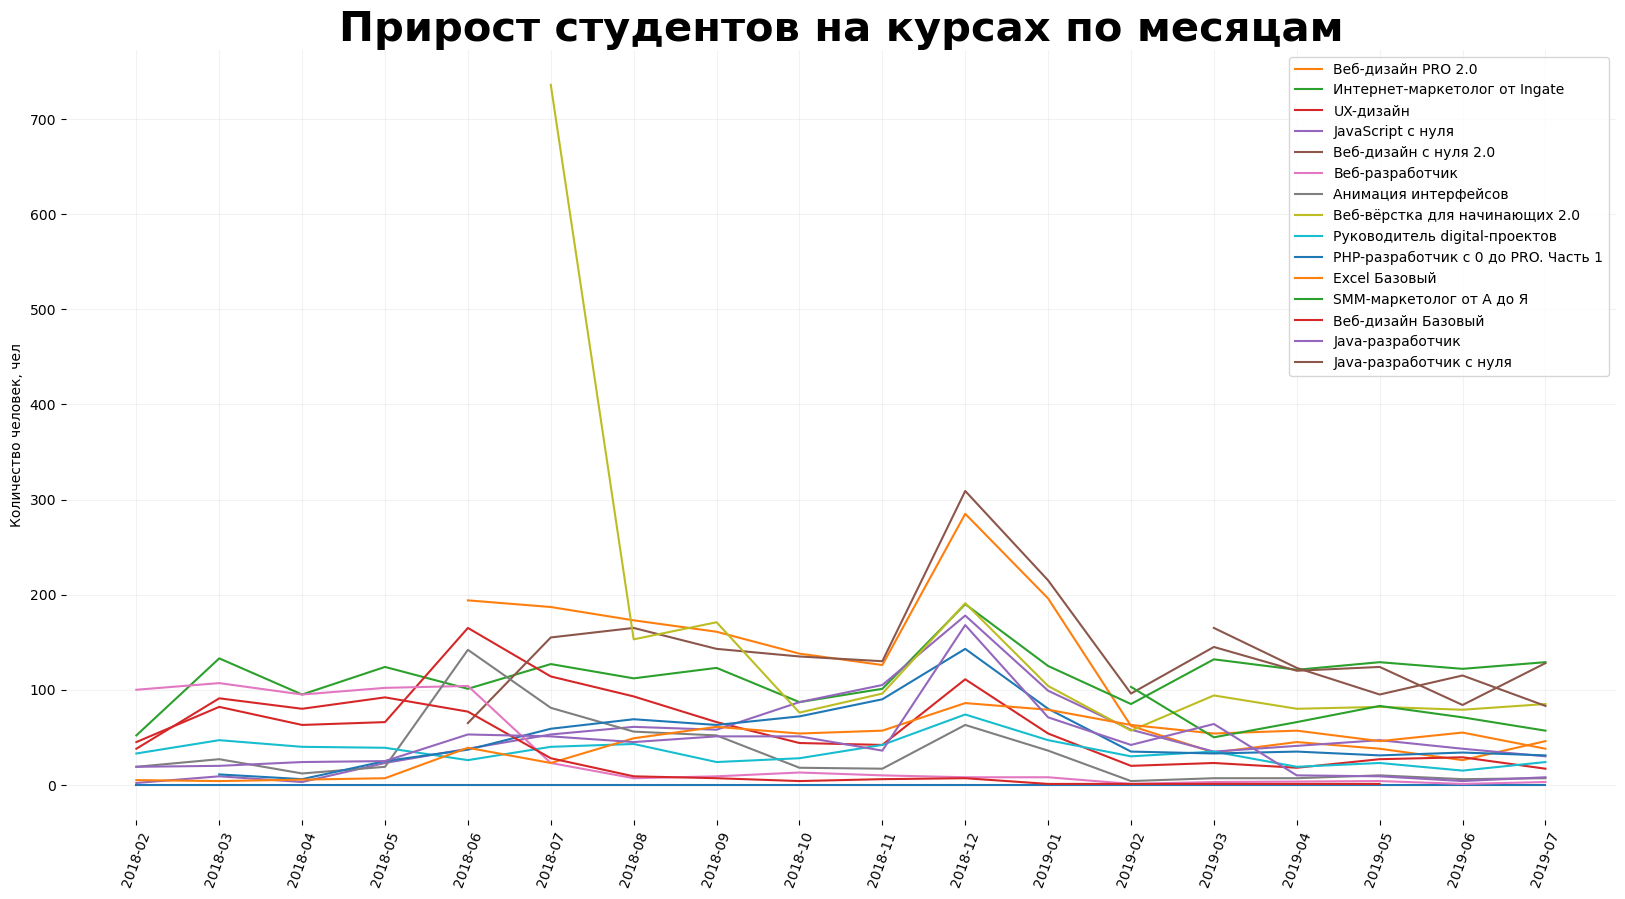

In [27]:
# 2.3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для
# каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось,
# отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть
# не должно ⭐

# Рисую пустой график и устанавливаю значения по оси X и Y 

fig,subplot = plt.subplots(figsize = (20,10))                  
x_ticks = result_growth.index.levels[1]                             
y_ticks = [0 for i in range(len(result_growth.index.levels[1]))]     
subplot.plot(x_ticks, y_ticks)                                 

# Запускаю цикла по каждому курсу в списке курсов
for course in list_courses:             
    x_ticks = result_growth.loc[course].index  # Значения по оси Х
    y_ticks = result_growth.loc[course,'student_growth']  # Значения по оси У
    subplot.plot(x_ticks, y_ticks, label = course) # Рисую график по данным соотв. курса
    x_labels = [i for i in result_growth.index.levels[1]] # Список подписей для оси Х
    # Нанесение подписей на график с соотв. параметрами
    plt.xticks(result_growth.index.levels[1], rotation = 70, labels = x_labels) 

plt.box(on = None) # Команда для удаления рамки на графике

plt.grid(color='grey', alpha = 0.1)   # Установка сетки на график для удобства чтения данных

plt.legend()  # Вывожу легенду на график

subplot.set_title('Прирост студентов на курсах по месяцам', fontsize= 30, fontweight='bold') # Название графика
subplot.set_ylabel('Количество человек, чел')        # Подпись оси У
plt.show()

In [28]:
# 2.4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от
# марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного
# месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

df = main.copy()
# формирую датасет для продсчета прогресса выполнения домашней работы. Выбираю только те строки, где есть домашняя работа и 
# статус прохождения урока done
homeworks = df[(df['is_homework']==True) & (df['status']=='done')][['progress_id','course_title',\
                                                                    'start_date', 'finish_date']]

# колонки start_date и finish_date привожу к формату Datetime
homeworks['start_date'] = pd.to_datetime(homeworks['start_date'], format='mixed').dt.strftime('%Y-%m')
homeworks['finish_date'] = pd.to_datetime(homeworks['finish_date'], format='mixed').dt.strftime('%Y-%m')

# Добавляю колонки для всея индивидуальных месяцев (с марта 2016 по июль 2019):
for dt in pd.date_range("2016-03-01", "2019-07-01", freq="MS"):
    new_column = str.format("{}-{:02d}", dt.year, dt.month)
    homeworks[new_column] = 0
    
# В цикле для каждой строки таблицы сделаем объект типа DatetimeIndex в диапазоне значений в колонках
# start и finish, а затем для всякого его элемента в этом объекте запишем значение 1 для соответствующей колонки:
for ind, row in homeworks.iterrows():
    start  = row['start_date']  + "-01"
    finish = row['finish_date'] + "-01"
    dtRange = pd.date_range(start, finish, freq="MS")
    for dt in dtRange:
        colName = str.format("{}-{:02d}", dt.year, dt.month)
        homeworks.loc[ind, colName] = 1 

homeworks.head(1)

progress_id        course_title start_date  \
4  a387ab916f402cb3fbfffd29f68fd0ce  Веб-дизайн PRO 2.0    2018-06   

  finish_date  2016-03  2016-04  2016-05  2016-06  2016-07  2016-08  ...  \
4     2018-06        0        0        0        0        0        0  ...   

   2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  2019-04  2019-05  \
4        0        0        0        0        0        0        0        0   

   2019-06  2019-07  
4        0        0  

[1 rows x 45 columns]

In [29]:
# подсчитаем количество прогрессов по каждому курсу в каждом месяце
homeworks = homeworks.groupby('course_title').sum(numeric_only=True).T
homeworks.head(2)

course_title  Excel Базовый  Java-разработчик  Java-разработчик c нуля  \
2016-03                   0                 0                        0   
2016-04                   0                 0                        0   

course_title  JavaScript с нуля  PHP-разработчик с 0 до PRO. Часть 1  \
2016-03                       0                                    0   
2016-04                       0                                    0   

course_title  SMM-маркетолог от А до Я  UX-дизайн  Анимация интерфейсов  \
2016-03                              0          0                     0   
2016-04                              0          0                     0   

course_title  Веб-вёрстка для начинающих 2.0  Веб-дизайн PRO 2.0  \
2016-03                                    0                   0   
2016-04                                    0                   0   

course_title  Веб-дизайн Базовый  Веб-дизайн с нуля 2.0  Веб-разработчик  \
2016-03                        0                      0                5   
2016-04                        0                      0                0   

course_title  Интернет-маркетолог от Ingate  Руководитель digital-проектов  
2016-03                                   0                              0  
2016-04                                   0                              0

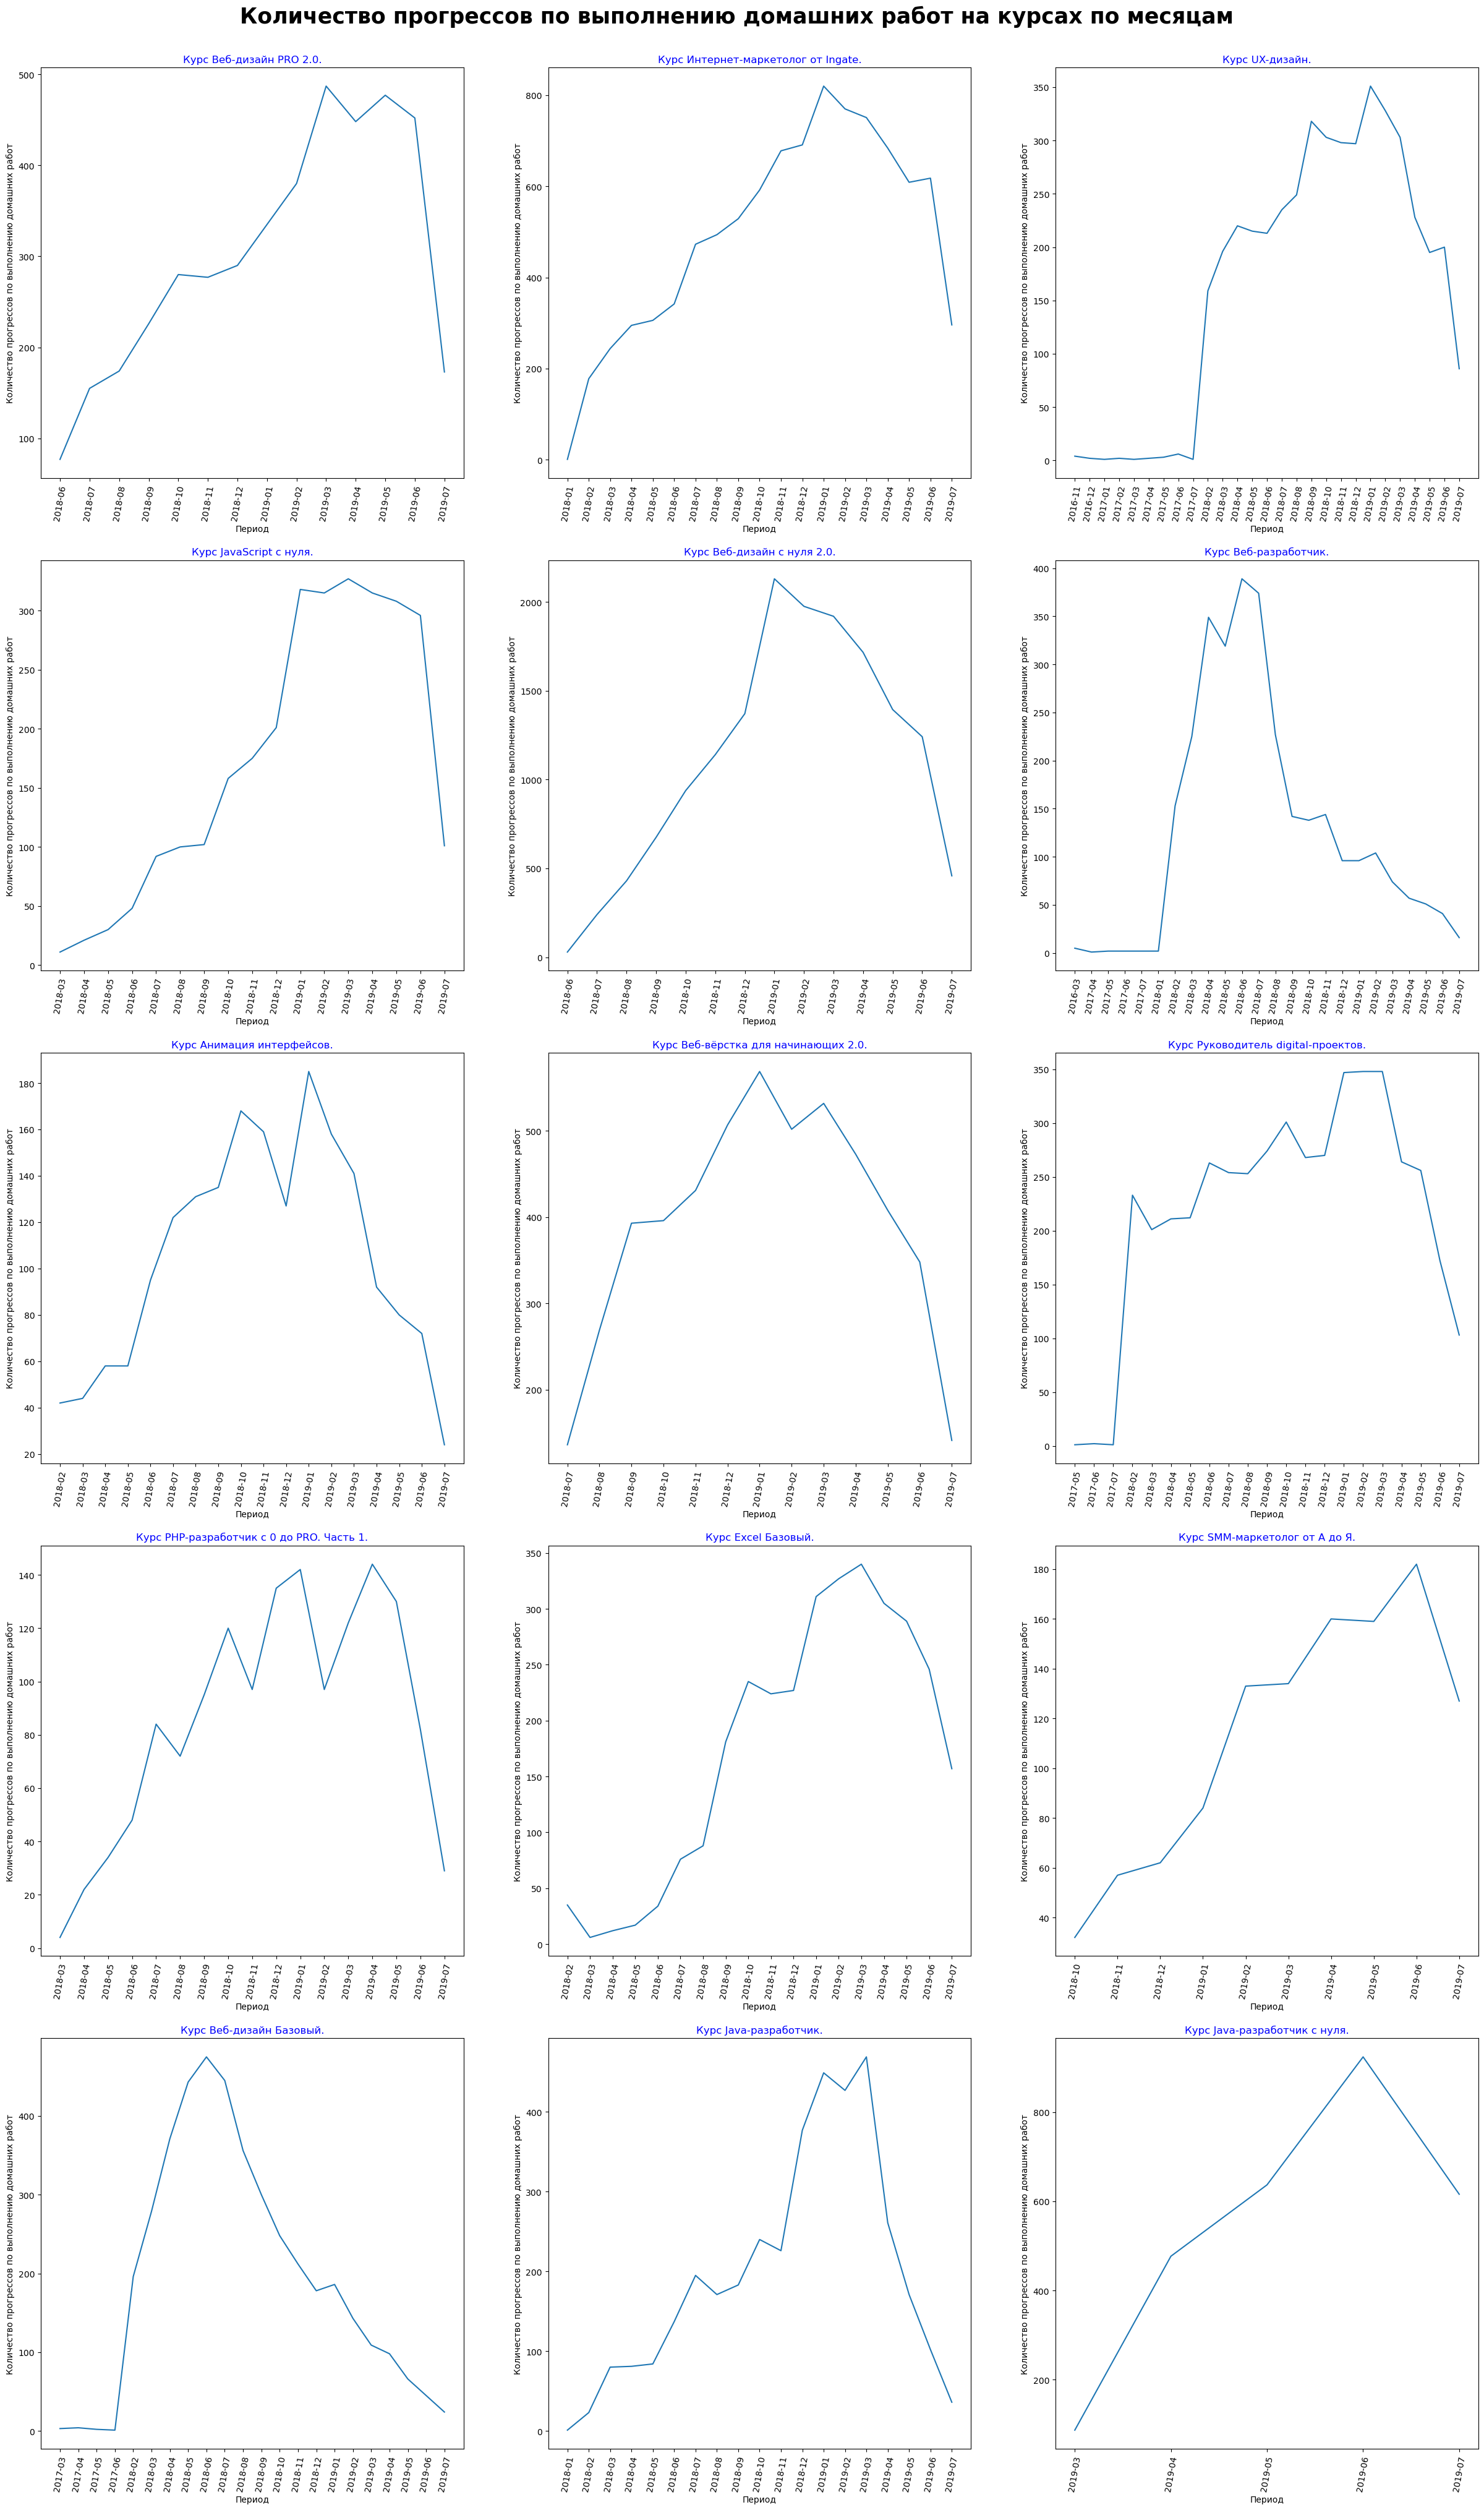

In [30]:
# 2.5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны.
# Ticks нужно развернуть так, чтобы они были читаемы

fig, axs = plt.subplots(figsize = (30, 50), ncols = 3, nrows = 5)

# формирую список с названиями курсов
list_courses = main['course_title'].unique()

# в цикле рисую 15 графиков
i = 0
for x in range(5):
    for y in range(3):
        course = list_courses[i]
        # формирую датасет для курса
        data = pd.DataFrame(homeworks[course])
        data = data[data[course]>0]
        # рисую график для курса
        axs[x][y].plot(data)
       
        # подписываю все параметры для графика
        axs[x][y].set_title(f'Курс {course}.', color='blue')
        axs[x][y].set_ylabel('Количество прогрессов по выполнению домашних работ')
        axs[x][y].set_xlabel('Период')
        axs[x][y].set_xticks(data.index)
        axs[x][y].xaxis.set_tick_params(rotation = 80)
        i += 1

fig.suptitle('Количество прогрессов по выполнению домашних работ на курсах по месяцам', y = 0.9,\
             fontsize= 25, fontweight='bold')

plt.show()

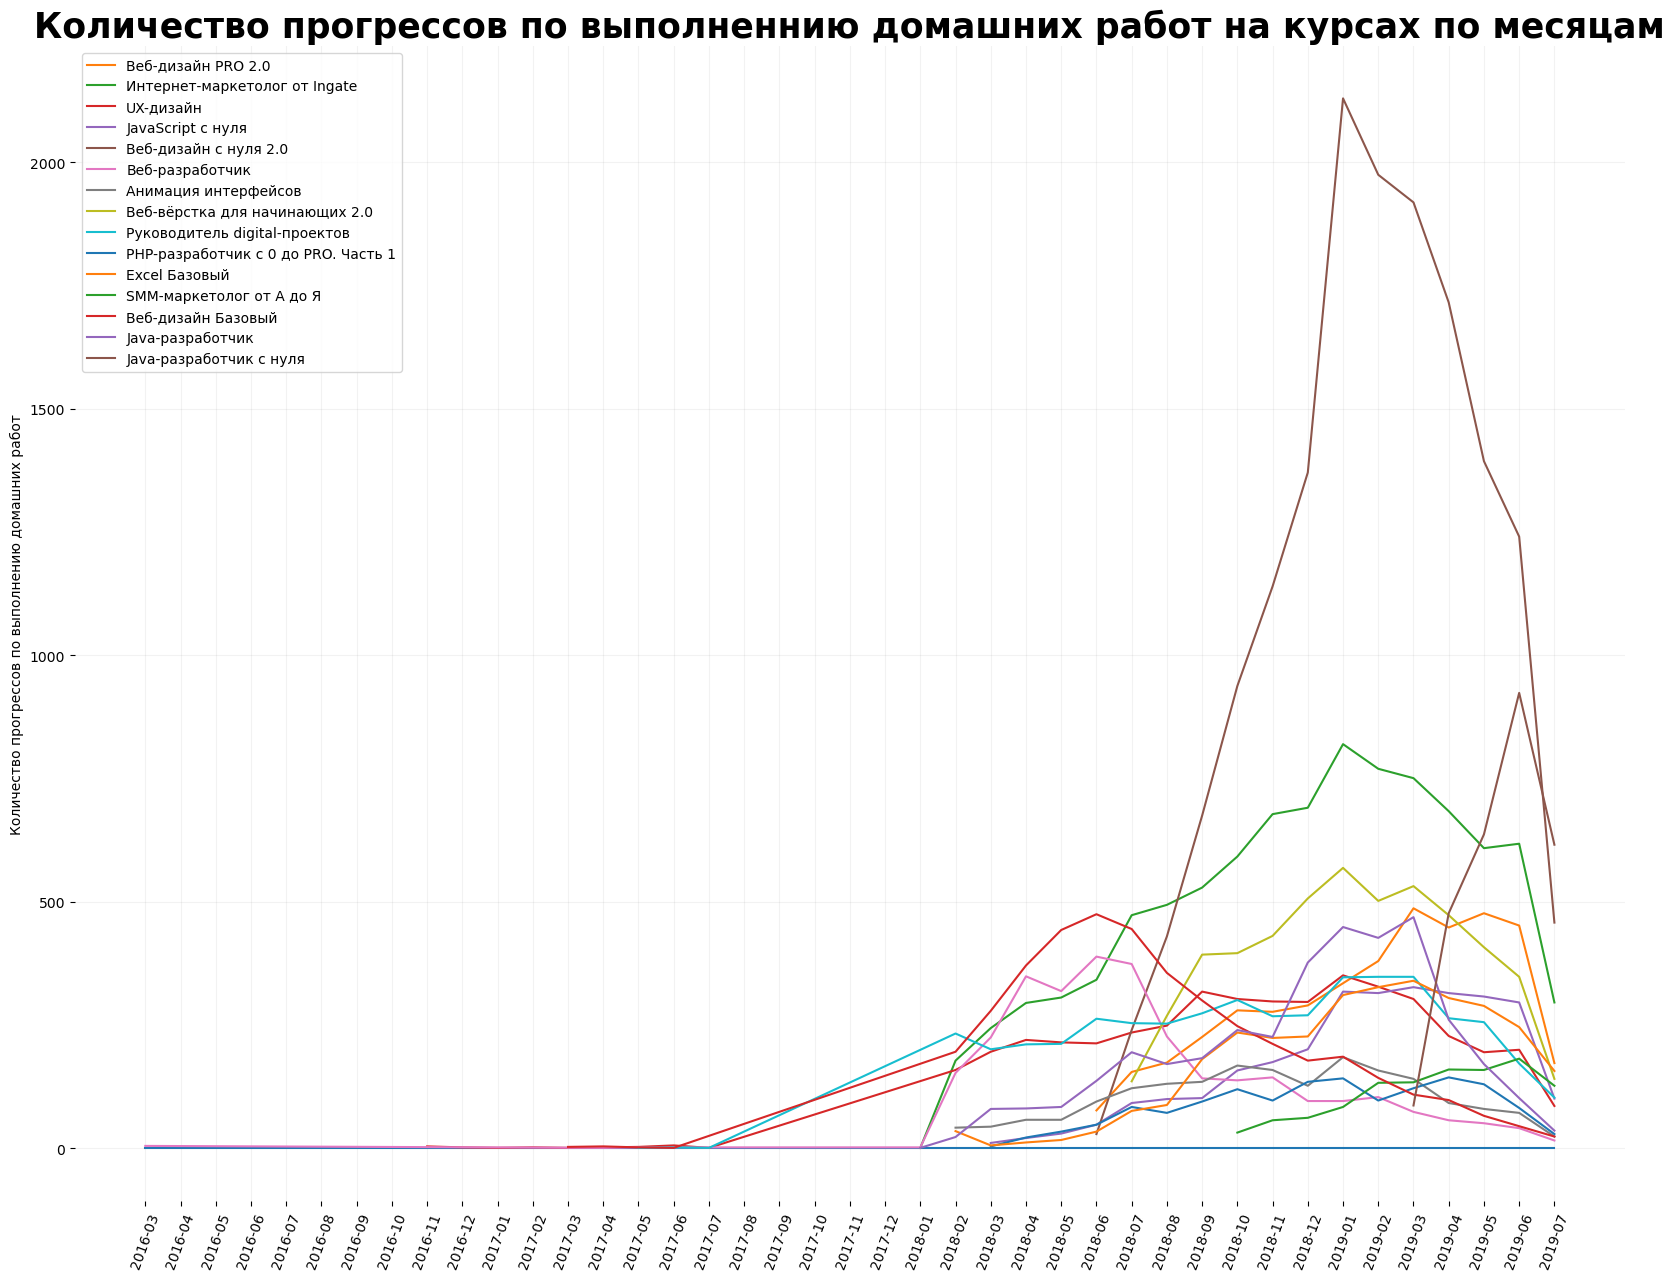

In [31]:
# 2.6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике.
# Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов,
# должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

# Рисую пустой график и устанавливаю значения по оси X и Y 

fig,subplot = plt.subplots(figsize = (20,15))                  
x_ticks = homeworks.index                             
y_ticks = [0 for i in range(len(homeworks.index))]     
subplot.plot(x_ticks, y_ticks)                                 

# Запускаю цикла по каждому курсу в списке курсов
for course in list_courses:
    data = pd.DataFrame(homeworks[course])
    data = data[data[course]>0]
    x_ticks = data.index  # Значения по оси Х
    y_ticks = data[course]  # Значения по оси У
    subplot.plot(x_ticks, y_ticks, label = course) # Рисую график по данным соотв. курса
    x_labels = [i for i in homeworks.index] # Список подписей для оси Х
    # Нанесение подписей на график с соотв. параметрами
    plt.xticks(homeworks.index, rotation = 70, labels = x_labels) 

plt.box(on = None) # Команда для удаления рамки на графике

plt.grid(color='grey', alpha = 0.1)   # Установка сетки на график для удобства чтения данных

plt.legend()  # Вывожу легенду на график

subplot.set_title('Количество прогрессов по выполненнию домашних работ на курсах по месяцам',\
                  fontsize= 25, fontweight='bold') # Название графика
subplot.set_ylabel('Количество прогрессов по выполнению домашних работ')        # Подпись оси У
plt.show()

In [32]:
# 2.7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

По расчета и анализа данных можно сделать следующие выводы:
- [ ] Если рассматривать  графики прироста студентов можно заметить некоторую сезонность, обычно всплески наблюдаются в зимний сезон (ноябрь-январь), вероятно из-за короткого светового дня у людей появляется больше свободного времени или в период новогодних праздников, люди хотят изменить свою жизнь. Также всплеск наблюдается июне месяце, в это время молодежь уходит на каникулы и у них появляется возможность заниматься чем то другим, кроме учебы.
- [ ] Количество прогрессов по выполнению  домашних заданий зависит от прироста студентов, так как в начале курса всегда хочется побыстрее все закончить. На некоторых курсах (например, курс Верь-верстка для начинающих 2.0), графики прироста студентов и количества прогрессов по выполнению домашних работ совершенно отличаются. Можно предположить, что количество прогрессов еще зависит от модуля прохождения студентов, так как не все модули содержат домашнюю работу.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [35]:
### YOUR CODE HERE ###
# 3.1. Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и 
# окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между
# временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

# формирую датасет для вычислений
problem = main[['course_title', 'progress_id', 'module_title', 'module_number', 'lesson_number',\
                       'status', 'start_date', 'finish_date']][main['status']=='done']
 
# группирую по трем колонкам ('course_title', 'module_title', 'progress_id') и в колонке 'start_date' нахожу минимум, а
# в колонке 'finish_date' нахожу максиму, результат записываю в колонку module_start и module_finish
problem = problem.groupby(['course_title', 'module_number', 'module_title', 'progress_id']).agg(module_start =\
                                                ('start_date','min'), module_finish = ('finish_date','max'))

# колонки module_start и module_finish привожу в формат datetime64[ns]
problem['module_start'] = pd.to_datetime(pd.to_datetime(problem['module_start'], format='mixed').dt.strftime('%Y-%m-%d %H:%M:%S'))
problem['module_finish'] = pd.to_datetime(pd.to_datetime(problem['module_finish'], format='mixed').dt.strftime('%Y-%m-%d %H:%M:%S'))

# нахожу разницу между началом и завершением модуля, результат записываю в колонку difference_time в днях
problem['difference_time'] = (problem['module_finish'] - problem['module_start']).dt.days
problem.head(2)

module_start  \
course_title  module_number module_title              progress_id                                            
Excel Базовый 1             Основной функционал Excel 008b5a9499c13dbde152a998c0f7c8d4 2018-08-07 09:41:52   
                                                      01913637c65f73ec70b5d4affbcc61bf 2018-09-06 11:37:16   

                                                                                             module_finish  \
course_title  module_number module_title              progress_id                                            
Excel Базовый 1             Основной функционал Excel 008b5a9499c13dbde152a998c0f7c8d4 2018-09-25 08:42:23   
                                                      01913637c65f73ec70b5d4affbcc61bf 2018-09-07 13:07:14   

                                                                                        difference_time  
course_title  module_number module_title              progress_id                                        
Excel Базовый 1             Основной функционал Excel 008b5a9499c13dbde152a998c0f7c8d4               48  
                                                      01913637c65f73ec70b5d4affbcc61bf                1

In [36]:
# расчитываю min, max, mean и median значения для каждого курса для каждого модуля
problem_result = problem.groupby(['course_title', 'module_number', 'module_title']).agg(
                                                           min_time = ('difference_time', 'min'),
                                                           max_time = ('difference_time', 'max'),
                                                           mean_time = ('difference_time', 'mean'),
                                                           median_time = ('difference_time', 'median'))
problem_result.reset_index(level = [1,2], inplace = True)
problem_result.head(2)

module_number                             module_title  \
course_title                                                            
Excel Базовый              1                Основной функционал Excel   
Excel Базовый              2  Основной функционал Excel (продолжение)   

               min_time  max_time  mean_time  median_time  
course_title                                               
Excel Базовый         0       390  27.845361          8.0  
Excel Базовый         0       274  11.884211          4.0

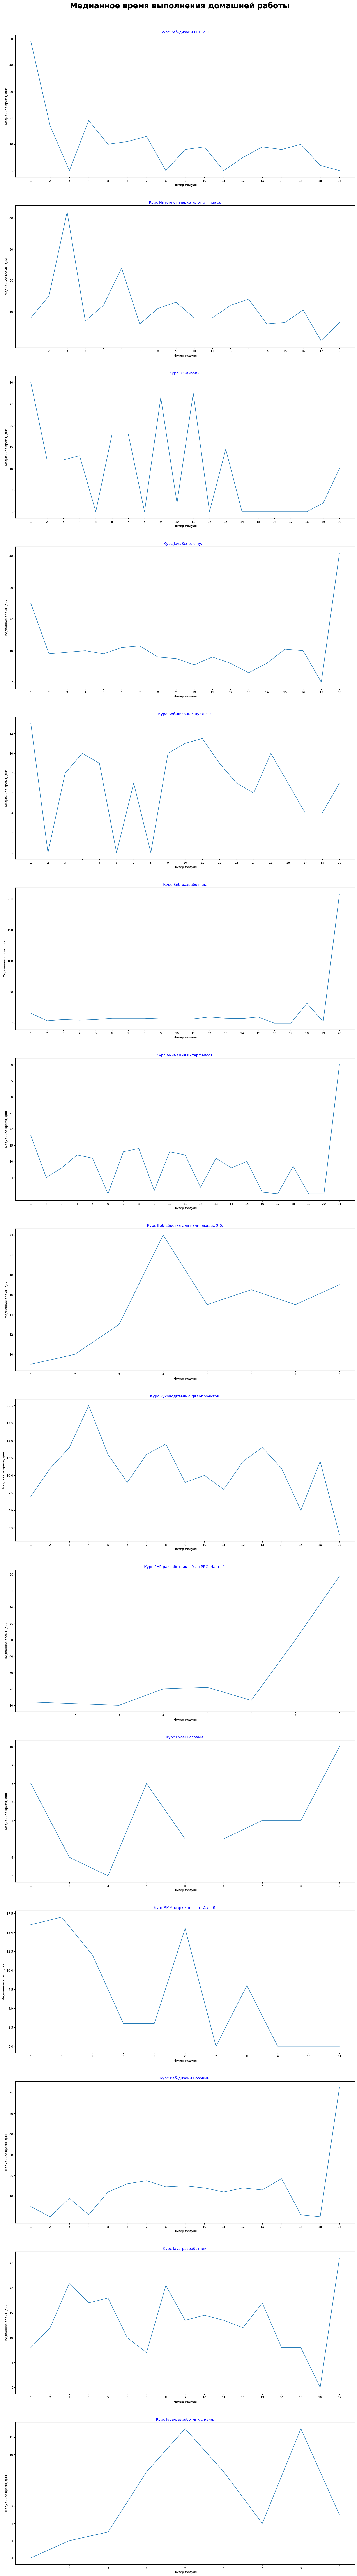

In [37]:
# 3.2. На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 
# 15 графиков. Графики должны иметь заголовки

fig, axs = plt.subplots(figsize = (20, 150), ncols = 1, nrows = 15)

# в цикле рисую 15 графиков
i = 0
for x in range(15):
    course = list_courses[x]
    # формирую датафрейм для рисования графиков
    data = problem_result[problem_result.index==course][['module_number','module_title','median_time']].astype({'module_number': str})

    # рисую график для курса
    axs[x].plot(data['module_number'], data['median_time'])
       
    # подписываю все параметры для графика
    axs[x].set_title(f'Курс {course}.', color='blue')
    axs[x].set_xlabel('Номер модуля')
    axs[x].set_ylabel('Медианное время, дни')
    
       
    i += 1

fig.suptitle('Медианное время выполнения домашней работы', fontsize= 25, fontweight='bold', y=0.89)


plt.show()


In [38]:
# 3.3. (p) Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь)
# для каждого курса.

# формирую датасет для расчета
season_problem = problem[['module_finish', 'difference_time']]
# создаю новую колонку с месяцем
season_problem['month'] = season_problem['module_finish'].dt.strftime('%m')
# группирую и высчитываю медианное время выполнения домашней работы
season_problem = season_problem.groupby(['course_title', 'month']).agg(median = ('difference_time', 'median'))
season_problem.reset_index(level = [0,1], inplace = True)
season_problem

course_title month  median
0                    Excel Базовый    01     5.0
1                    Excel Базовый    02     7.0
2                    Excel Базовый    03     6.0
3                    Excel Базовый    04     6.0
4                    Excel Базовый    05     6.0
..                             ...   ...     ...
166  Руководитель digital-проектов    08    17.0
167  Руководитель digital-проектов    09    13.0
168  Руководитель digital-проектов    10    11.5
169  Руководитель digital-проектов    11     9.0
170  Руководитель digital-проектов    12    11.0

[171 rows x 3 columns]

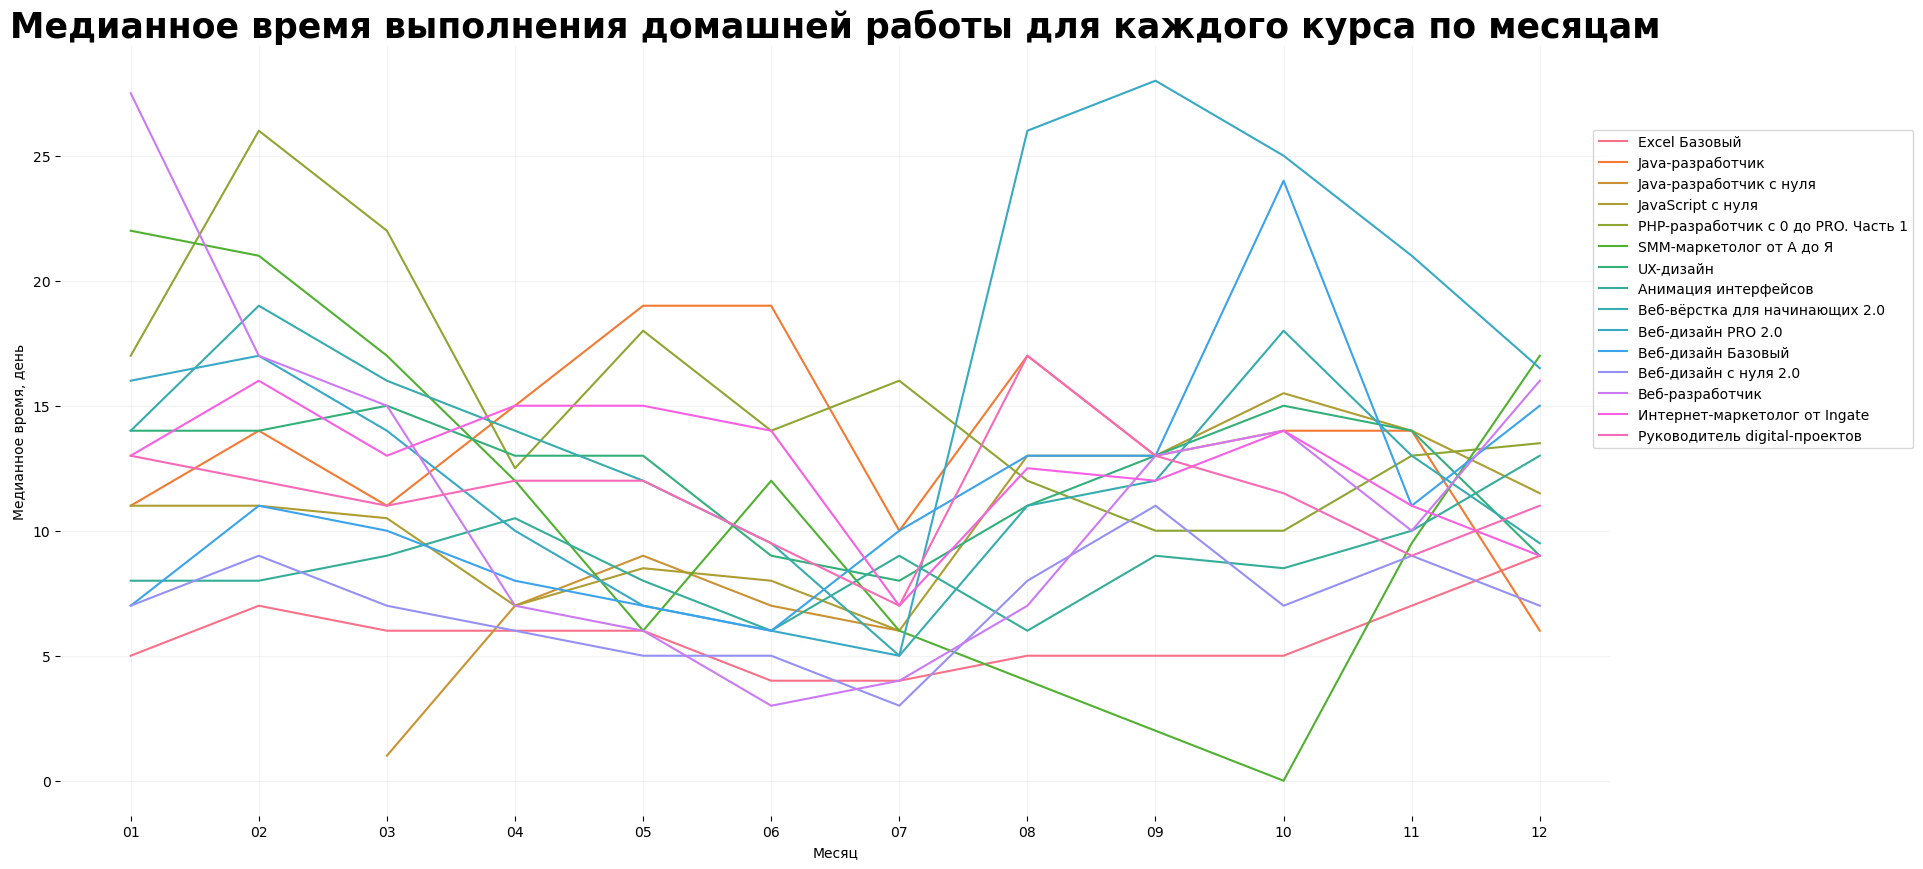

In [39]:
# 3.4. На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем 
# выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, 
#должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

# Рисую графики

fig,subplot = plt.subplots(figsize = (20,10)) 

sns.lineplot(data=season_problem, x='month', y='median', hue='course_title')
    
plt.box(on = None) # Команда для удаления рамки на графике

plt.grid(color='grey', alpha = 0.1)   # Установка сетки на график для удобства чтения данных

plt.legend(loc='best', bbox_to_anchor=(0.7, 0.4, 0.5, 0.5))  # Вывожу легенду на график
    
subplot.set_title('Медианное время выполнения домашней работы для каждого курса по месяцам',\
                  fontsize= 25, fontweight='bold') # Название графика
subplot.set_xlabel('Месяц')        # Подпись оси Х
subplot.set_ylabel('Медианное время, день')        # Подпись оси У
plt.show()

In [40]:
# 3.5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

После расчета и анализа данных можно сделать следующие выводы:
- [ ] Анализируя графики медианного времени выполнения домашней работы, можно сделать вывод, что в большинстве моделей,
домашнюю работу выполняют  до 20 дней. Большой всплеск в 200 дней просматривается только на курсе Веб разработчик в модуле Проверка.
- [ ] Анализируя график сезонности выполнения домашней работы, можно четко проследить подъем в январе (новогодние праздники и сессия у 
студентов), начиная с февраля до июля постепенное снижение времени на выполнение домашней работы. Начиная с июля по всем курсам 
наблюдается увеличение времени на выполнение домашней работы (вероятно это связано с летними отпусками)

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [43]:
#4.1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов,
# приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле),
# к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

# формирую данные, чтобы узнать сколько студентов начало перешли в новый модуль
st_data = main.copy()
# оставляю только те строчки, в которых есть домашняя работа
st_data = st_data[st_data['is_homework']==True]
# выбираю нужные мне столбцы
st_data = st_data[['course_title', 'module_number', 'module_title', 'student_id', 'lesson_number', 'status']]
#  группирую по названию курса и модуля, создаю новый столбей с количеством студентов, которые начали делать
# домашнюю работу                
st_data = st_data.groupby(['course_title', 'module_number', 'module_title', 'lesson_number']).agg(count_stud_start
                                                                                       =('student_id', 'nunique'))
st_data.reset_index(level = [0,1,2,3], inplace = True)
# в колонке lesson_number оставляем только минимальный урок в модуле
min_lesson = st_data.groupby(['course_title', 'module_number', 'module_title']).agg(lesson_number=
                                                                                    ('lesson_number', 'min'))
min_lesson.reset_index(level = [0,1,2], inplace = True)
# сливаю два дата сета в один, получаю датасет, в котором указаны минимальный урок с домашним заданием в модуле
# и количество студентов на нем
start_data = st_data.merge(min_lesson, how='right').drop(columns = ['lesson_number'],axis = 1)

In [44]:
fin_data = main.copy()
# оставляю только те строчки, в которых есть домашняя работа и домашняя работа сдана
fin_data = fin_data[(fin_data['is_homework']==True) & (fin_data['status']=='done')]
# выбираю нужные мне столбцы
fin_data = fin_data[['course_title', 'module_number', 'module_title', 'student_id', 'lesson_number']]
#  группирую по названию курса и модуля, создаю новый столбей с количеством студентов, которые сделали
# домашнюю работу                
fin_data = fin_data.groupby(['course_title', 'module_number', 'module_title', 'lesson_number']).agg(count_stud_done =
                                                                                    ('student_id', 'nunique'))
fin_data.reset_index(level = [0,1,2,3], inplace = True)
# в колонке lesson_number оставляем только минимальный урок в модуле
max_lesson = st_data.groupby(['course_title', 'module_number', 'module_title']).agg(lesson_number=
                                                                                    ('lesson_number', 'max'))
max_lesson.reset_index(level = [0,1,2], inplace = True)
# сливаю два дата сета в один, получаю датасет, в котором указаны минимальный урок с домашним заданием в модуле
# и количество студентов на нем
finish_data = fin_data.merge(max_lesson, how='right').drop(columns = ['lesson_number'],axis = 1)

In [45]:
# сливаю два датасета
conversion = start_data.merge(finish_data, how='outer')

result_conversion = pd.DataFrame()
for n in range(15):
    data = list(conversion.groupby('course_title'))[n][1]
    data.count_stud_done = conversion.count_stud_done.shift(1)
    data['conversion'] = data['count_stud_start'] / data['count_stud_done']
    data = data.iloc [1: , :]
    result_conversion = pd.concat([result_conversion, data])

result_conversion.head(5)

course_title  module_number  \
1  Excel Базовый              2   
2  Excel Базовый              3   
3  Excel Базовый              4   
4  Excel Базовый              5   
5  Excel Базовый              6   

                                        module_title  count_stud_start  \
1            Основной функционал Excel (продолжение)               434   
2                  Формулы и функции Excel. Введение               398   
3  Формулы и функции Excel. Продолжаем работать с...               345   
4     Формулы и функции Excel. Более сложные формулы               298   
5  Формулы и функции Excel. Работа с ошибками, пр...               263   

   count_stud_done  conversion  
1            458.0    0.947598  
2            406.0    0.980296  
3            387.0    0.891473  
4            303.0    0.983498  
5            270.0    0.974074

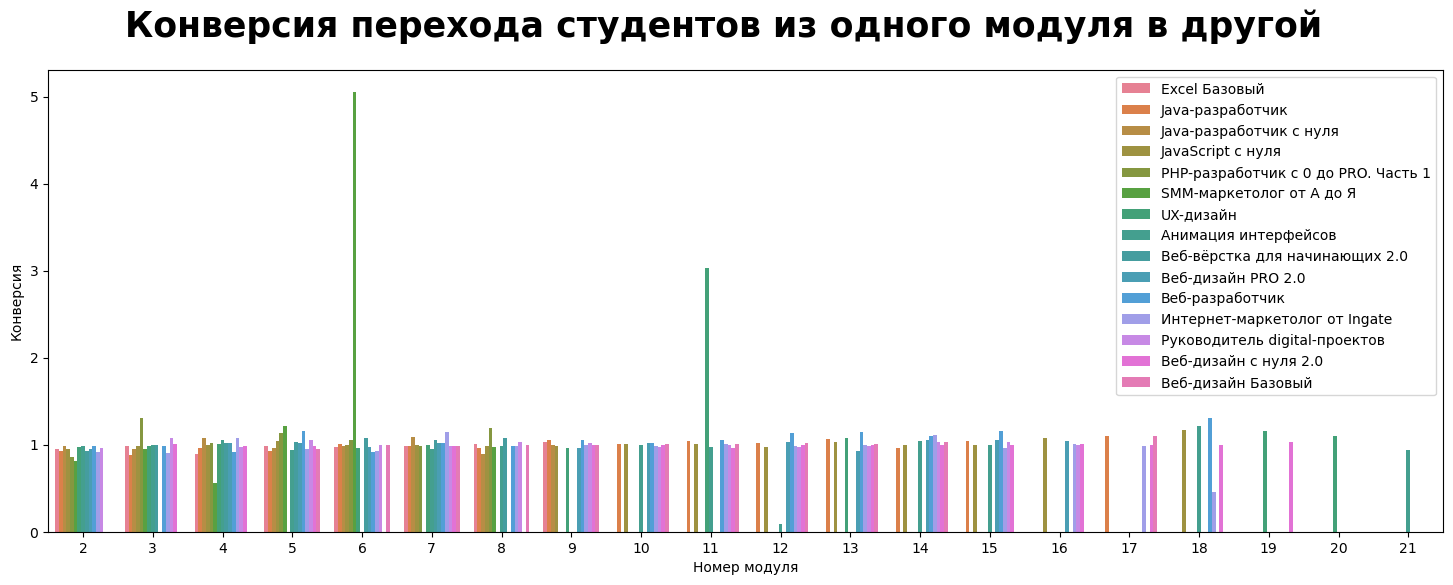

In [46]:
# 4.2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь
# заголовок. Ticks нужно развернуть так, чтобы они были читаемы

fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(data=result_conversion, x='module_number', y='conversion', hue='course_title', palette='husl')
    
plt.legend(loc='upper right')

ax.set_ylabel('Конверсия')
ax.set_xlabel('Номер модуля')
    
fig.suptitle('Конверсия перехода студентов из одного модуля в другой', fontsize= 25, fontweight='bold')

plt.show()

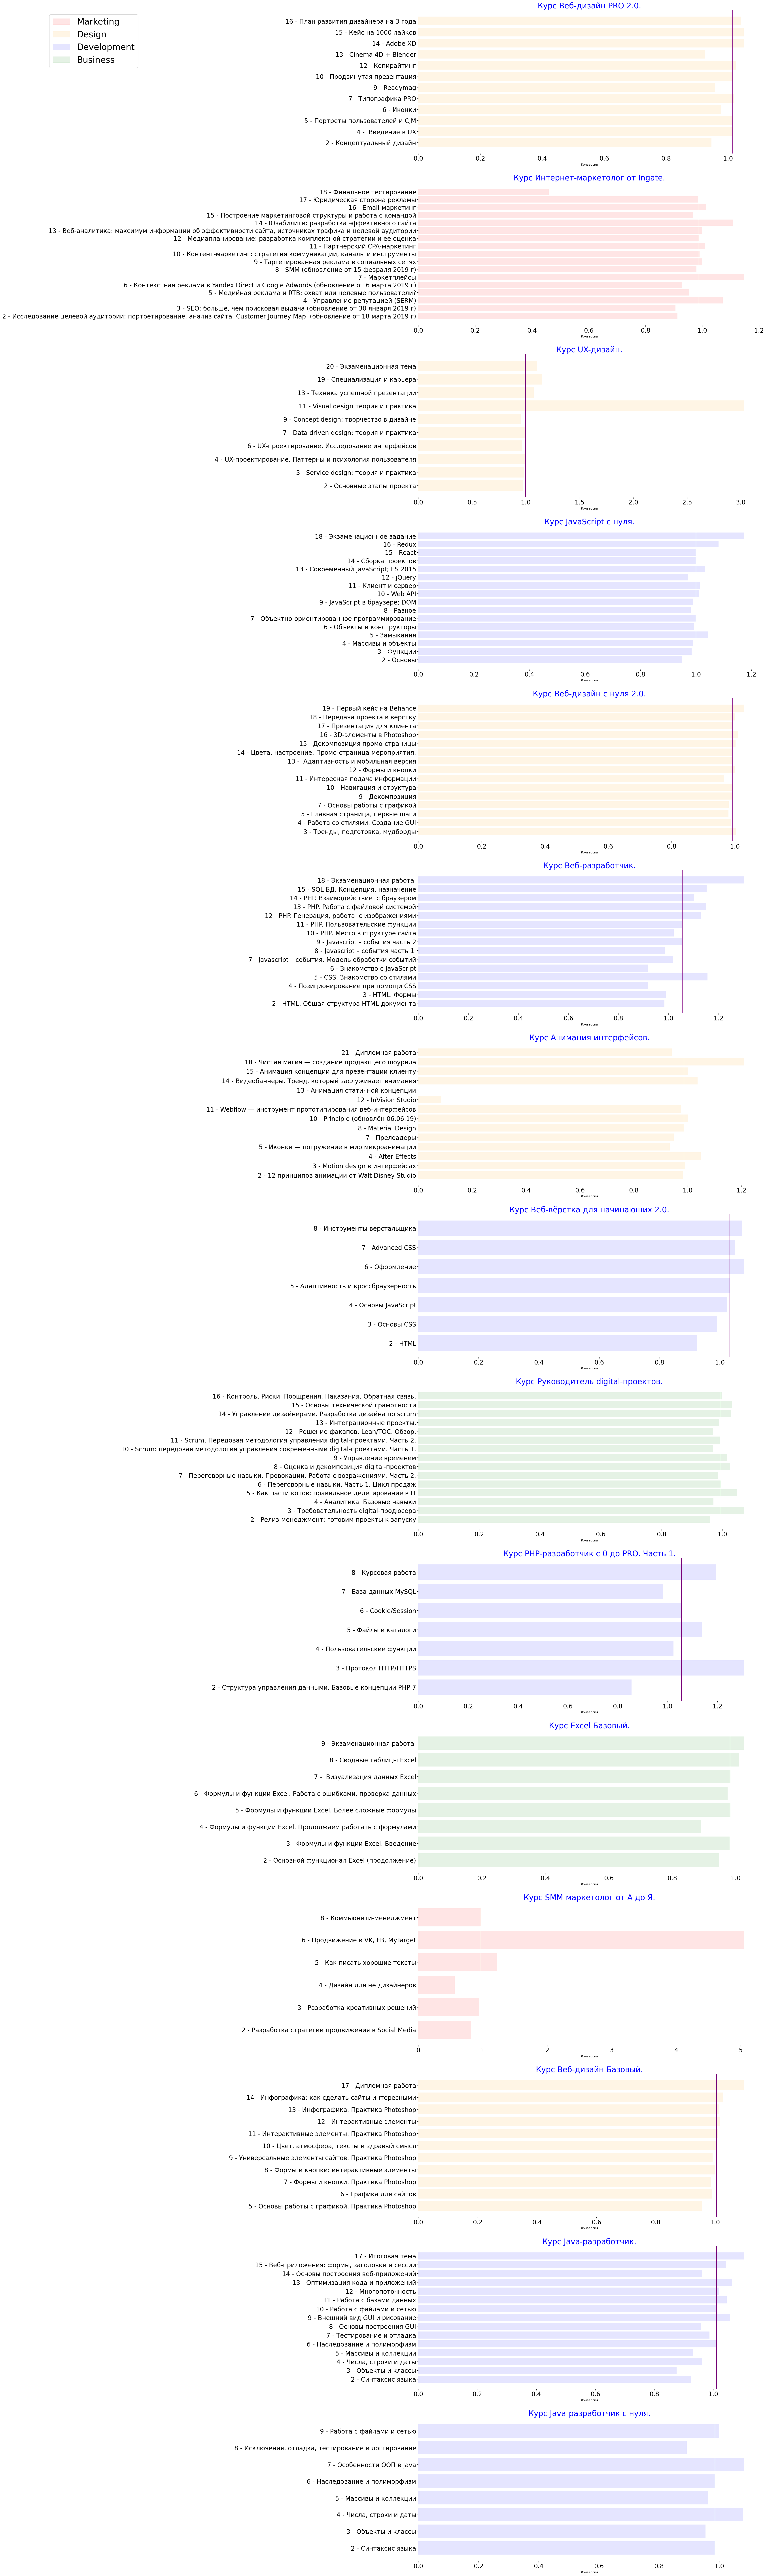

In [47]:
# 4.3 Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из
# одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название 
# модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна
# стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой
# цвет. Рамок у графиков быть не должно

result_convers = result_conversion.astype({'module_number': str})
result_convers['N_title'] = result_convers['module_number'] + ' - ' + result_convers['module_title']

result_convers = result_convers.merge(data_courses, left_on = 'course_title', right_on = 'title')[[
                    'course_title','field','N_title', 'conversion']]

result_convers['color'] = 'green'
result_convers.loc[result_convers['field']=='Marketing', 'color'] = 'red' 
result_convers.loc[result_convers['field']=='Design', 'color'] = 'orange' 
result_convers.loc[result_convers['field']=='Development', 'color'] = 'blue'

fig, ax = plt.subplots(figsize=(20, 150), ncols=1, nrows=15)

# в цикле рисую 15 графиков
for i in range(15):
    course = list_courses[i]
    data = result_convers[result_convers['course_title']==course][['N_title','field', 'conversion', 'color']]
    x = ax[i].barh(data['N_title'], data['conversion'], alpha = 0.1, color = data['color'], 
               label = data['field'])
    ax[i].set_title(f'Курс {course}.', color='blue', fontsize= 25)
    ax[i].set_xlabel('Конверсия')
    ax[i].tick_params(labelsize=20)
    
    # рисую линию медианы
    x =  data['conversion'].median()
    ax[i].axvline(x, color='purple') 
    
    # удаляю рамки вокруг график
    ax[i].spines[:].set_visible(False)
 

# формирую легенду
red_patch = mpatches.Patch(color='red', label='Marketing', alpha=0.1)
orange_patch = mpatches.Patch(color='orange', label='Design', alpha=0.1)
blue_patch = mpatches.Patch(color='blue', label='Development', alpha=0.1)
green_patch = mpatches.Patch(color='green', label='Business', alpha=0.1)

fig.legend(handles=[red_patch, orange_patch, blue_patch, green_patch],
          bbox_to_anchor=(-0.5, 0.88, 0, 0), prop={'size': 28})



plt.show()

In [48]:
# 4.4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

После расчета и анализа данных можно сделать следующие выводы:
- [ ] практически на всех курсах конверсия по всем модулям в пределах 1, это подтверждает и медианное значение в графиках.
- [ ] непонятный всплеск наблюдает только на Курсе UX-дизайн на 11 модуле и на Курсе SMM-маркетолог от А до Я на 6 модуле. Могу сделать два предположения. Первое, что предшествующее домашнее задание слишком легкое, студенты их быстро делают и переходят к изучению следующего курса, не дожидаясь, когда его проверит преподаватель (а преподаватель проверят долго, так как студенты одновременно сдают работы). Второе, домашнее задание слишком сложное или объемное. Студенты переходят к изучению нового модуля и параллельно решают домашнее задание.


## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [51]:
### YOUR CODE HERE ###

data = main.copy()

# отбираю столбцы, которы мне будут нужны и строки со статусом done
data = data[['student_id', 'course_title', 'module_number', 'start_date', 'finish_date', 'status']]
data = data[data.status=='done']
data.head()

student_id        course_title  module_number  \
0  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0              2   
1  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0              1   
2  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0              2   
3  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0              1   
4  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0              1   

                      start_date                    finish_date status  
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   done  
1  2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00   done  
2  2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00   done  
3   2018-06-20 16:00:06.36178+00  2018-06-21 19:09:30.845034+00   done  
4  2018-06-21 19:10:36.957891+00  2018-06-28 15:59:25.320418+00   done

In [52]:
# отбираю строчки, с максимальным номером модуля
max_module = data.groupby(['student_id', 'course_title']).agg(max_module = ('module_number',
                                                                  'max'))
max_module.reset_index(level=(0, 1), inplace=True)
max_module.head()

student_id                   course_title  max_module
0  000333b6aa5706c53f4d2ec24c7a128d       SMM-маркетолог от А до Я           6
1  0007e271c3f2f20ff8675df9d81e0401          Веб-дизайн с нуля 2.0          11
2  000ca3ad0aaedff60d95d309b038210b  Интернет-маркетолог от Ingate           5
3  0010ab47e706e3ae6ac718d5cf06b752  Интернет-маркетолог от Ingate           5
4  00114204df65ed8458822835b928393c  Интернет-маркетолог от Ingate           2

In [53]:
# выбираю студентов которые закончили курс
finish_course = max_module.merge(count_modules, left_on='course_title', right_on=count_modules.index)
finish_course['result'] = np.where(finish_course['max_module'] == finish_course['module_count'],
                                  'completed','did not complete') 
finish = finish_course[finish_course.result=='completed']
finish.head()

student_id                    course_title  \
18  00781098a0f87b0c61786bbb67c79def  Веб-вёрстка для начинающих 2.0   
31  00ba106960bb9c8e03f97169dd2ec14a              Веб-дизайн PRO 2.0   
32  00ba106960bb9c8e03f97169dd2ec14a           Веб-дизайн с нуля 2.0   
43  00e0705b5d5dde933ecc456c5df455ab           Веб-дизайн с нуля 2.0   
47  010d6e8dc468762861b73274f3c4baf8   Руководитель digital-проектов   

    max_module  module_count     result  
18           8             8  completed  
31          17            17  completed  
32          19            19  completed  
43          19            19  completed  
47          17            17  completed

In [54]:
# узнаю сколько времени проходил каждый студент курс

course_time = main.copy()

# Соединия два датасета, выбираю те колонки, которые мне нужны, удаляю строки по которым нет времени окончания урока
course_time = course_time[['student_id', 'course_title', 'module_number','lesson_number', 
                           'start_date', 'finish_date', 'status']].dropna()

#Оставляю строки с началом курса и окончанием курса
course_time = course_time.groupby(['student_id','course_title']).agg(course_start =\
                                                 ('start_date','min'), course_finish = ('finish_date','max'))


# колонки module_start и module_finish привожу в формат datetime64[ns]
course_time['course_start'] = pd.to_datetime(pd.to_datetime(course_time['course_start'], format='mixed').dt.strftime(
                                                                                            '%Y-%m-%d %H:%M:%S'))
course_time['course_finish'] = pd.to_datetime(pd.to_datetime(course_time['course_finish'], format='mixed').dt.strftime(
                                                                                            '%Y-%m-%d %H:%M:%S'))


# нахожу разницу между началом и завершением модуля, результат записываю в колонку difference_time в днях
course_time['course_time'] = (course_time['course_finish'] - course_time['course_start']).dt.days
course_time.reset_index(level=(0, 1), inplace=True)
course_time.head()

student_id                   course_title  \
0  000333b6aa5706c53f4d2ec24c7a128d       SMM-маркетолог от А до Я   
1  0007e271c3f2f20ff8675df9d81e0401          Веб-дизайн с нуля 2.0   
2  000ca3ad0aaedff60d95d309b038210b  Интернет-маркетолог от Ingate   
3  0010ab47e706e3ae6ac718d5cf06b752  Интернет-маркетолог от Ingate   
4  00114204df65ed8458822835b928393c  Интернет-маркетолог от Ingate   

         course_start       course_finish  course_time  
0 2019-05-31 13:07:52 2019-07-10 22:21:19           40  
1 2019-02-22 08:00:49 2019-06-20 07:45:06          117  
2 2019-05-18 14:16:33 2019-07-02 07:22:27           44  
3 2019-04-01 21:36:32 2019-05-18 21:15:07           46  
4 2018-09-28 11:44:47 2019-03-28 10:33:37          180

In [55]:
# узнаю время прохождения курса, только тех студентов, которые закончили курс
mean_time_finish = finish.merge(course_time, left_on=['student_id', 'course_title'],
                                   right_on = ['student_id', 'course_title'])
# считаюю среднее время прохождения курса
mean_time_finish = mean_time_finish.groupby('course_title').agg(mean_time = ('course_time', 'mean'))
mean_time_finish

mean_time
course_title                                   
Excel Базовый                         78.285714
Java-разработчик                     138.142857
Java-разработчик c нуля               93.388889
JavaScript с нуля                    207.692308
PHP-разработчик с 0 до PRO. Часть 1  214.200000
SMM-маркетолог от А до Я             127.800000
UX-дизайн                            345.000000
Анимация интерфейсов                 226.000000
Веб-вёрстка для начинающих 2.0       148.257143
Веб-дизайн PRO 2.0                   208.560000
Веб-дизайн Базовый                   231.065789
Веб-дизайн с нуля 2.0                159.293367
Веб-разработчик                      342.416667
Интернет-маркетолог от Ingate        267.214286
Руководитель digital-проектов        233.683333

In [56]:
# выбираю студентов которые не закончили курс 
not_finish_course = finish_course[finish_course.result=='did not complete']
not_finish_course.head()

student_id                   course_title  \
0  000333b6aa5706c53f4d2ec24c7a128d       SMM-маркетолог от А до Я   
1  0007e271c3f2f20ff8675df9d81e0401          Веб-дизайн с нуля 2.0   
2  000ca3ad0aaedff60d95d309b038210b  Интернет-маркетолог от Ingate   
3  0010ab47e706e3ae6ac718d5cf06b752  Интернет-маркетолог от Ingate   
4  00114204df65ed8458822835b928393c  Интернет-маркетолог от Ingate   

   max_module  module_count            result  
0           6            11  did not complete  
1          11            19  did not complete  
2           5            18  did not complete  
3           5            18  did not complete  
4           2            18  did not complete

In [57]:
# узнаю время прохождения курса, только тех студентов, которые не закончили курс
mean_time_not_finish = not_finish_course.merge(course_time, left_on=['student_id', 'course_title'],
                                   right_on = ['student_id', 'course_title'])
mean_time_not_finish.head()

student_id                   course_title  \
0  000333b6aa5706c53f4d2ec24c7a128d       SMM-маркетолог от А до Я   
1  0007e271c3f2f20ff8675df9d81e0401          Веб-дизайн с нуля 2.0   
2  000ca3ad0aaedff60d95d309b038210b  Интернет-маркетолог от Ingate   
3  0010ab47e706e3ae6ac718d5cf06b752  Интернет-маркетолог от Ingate   
4  00114204df65ed8458822835b928393c  Интернет-маркетолог от Ingate   

   max_module  module_count            result        course_start  \
0           6            11  did not complete 2019-05-31 13:07:52   
1          11            19  did not complete 2019-02-22 08:00:49   
2           5            18  did not complete 2019-05-18 14:16:33   
3           5            18  did not complete 2019-04-01 21:36:32   
4           2            18  did not complete 2018-09-28 11:44:47   

        course_finish  course_time  
0 2019-07-10 22:21:19           40  
1 2019-06-20 07:45:06          117  
2 2019-07-02 07:22:27           44  
3 2019-05-18 21:15:07           46  
4 2019-03-28 10:33:37          180

In [58]:
# добавляю столбик со среднем значением времени прохождения курса
result = mean_time_not_finish.merge(mean_time_finish, left_on='course_title', right_on=mean_time_finish.index)[
    ['student_id','course_title','course_time','mean_time']]
# в столбике ratio высчитываю отношение между прохождение курса студентом и средним временем прохождения курса
result['ratio'] = result['course_time'] / result['mean_time']
# столбик problem заполняю yes или no (условие, что время прохождения больше, чем 1.3 раза)
result['problem'] = np.where(result['ratio']>1.3, 'yes', 'no')
# отбираю строчки, где студент является проблемным
result = result[result.problem=='yes']
result

student_id                    course_title  \
19     0082e6e7a5674d7c9ec466c380fef574  Веб-вёрстка для начинающих 2.0   
20     0082e6e7a5674d7c9ec466c380fef574                 Веб-разработчик   
21     0098ca12f73a56dadbf6099389305d80                   Excel Базовый   
25     00a99ffcb76cc03dda6b3210d4849f52   Интернет-маркетолог от Ingate   
48     012adf13237eaa7be1b7319ac94bbc3f  Веб-вёрстка для начинающих 2.0   
...                                 ...                             ...   
11885  ff5e8cdf1578fda9a8128520c3c215bb   Руководитель digital-проектов   
11888  ff78d229d9c0bbd6295f0231fd5d5f47   Интернет-маркетолог от Ingate   
11892  ffa8a487e8087b386877d67faebe7832        SMM-маркетолог от А до Я   
11897  ffb51e8fec9ca41f5f0d88aa34542e39   Интернет-маркетолог от Ingate   
11909  fff9c6b403f88a6b83dc1837a93dc4dd                Java-разработчик   

       course_time   mean_time     ratio problem  
19             276  148.257143  1.861630     yes  
20             487  342.416667  1.422244     yes  
21             105   78.285714  1.341241     yes  
25             413  267.214286  1.545576     yes  
48             250  148.257143  1.686259     yes  
...            ...         ...       ...     ...  
11885          448  233.683333  1.917124     yes  
11888          385  267.214286  1.440791     yes  
11892          169  127.800000  1.322379     yes  
11897          459  267.214286  1.717723     yes  
11909          252  138.142857  1.824199     yes  

[1498 rows x 6 columns]

In [59]:
# считаю количество проблемных студентов
count_problem = result.groupby('course_title').agg(count_students = ('student_id', 'count'))
count_problem

count_students
course_title                                       
Excel Базовый                                   145
Java-разработчик                                155
JavaScript с нуля                                51
PHP-разработчик с 0 до PRO. Часть 1              41
SMM-маркетолог от А до Я                         37
UX-дизайн                                        30
Анимация интерфейсов                             61
Веб-вёрстка для начинающих 2.0                  247
Веб-дизайн PRO 2.0                              162
Веб-дизайн Базовый                              113
Веб-дизайн с нуля 2.0                           208
Веб-разработчик                                  10
Интернет-маркетолог от Ingate                   173
Руководитель digital-проектов                    65

In [60]:
# Как одну из проблем, могу предположиь, что студенты у которых больше 1 курса, больше затрачивают времени на прохождение курса
count_courses = main.copy()
# Выбираю студентов у которых больше одного курса
count_courses = count_courses.groupby('student_id').agg(count_courses =('course_title','nunique'))
count_courses = count_courses[count_courses['count_courses']>1]
count_courses

count_courses
student_id                                     
0007e271c3f2f20ff8675df9d81e0401              2
00386b771938472b2df62108f5985c1e              4
00647ca62c6f122f9116f4b59157d26a              3
0066366dd4098a6ab35fa7eccc0b300a              3
00700f1e78ee577370c6fa5cea8ebd5a              2
...                                         ...
ffa96fc7af520a0dee7bdc7f7763332b              3
ffaa1bee55e8dfdfa2125f441de35c43              3
ffc4008315dff59b29e7733f43f85913              2
ffd7a91bcf8acfe1afd2e74c7374cf23              2
fff9c6b403f88a6b83dc1837a93dc4dd              2

[3331 rows x 1 columns]

In [61]:
# объединию датасеты, где студенты, которые не прошли курс и у которых больше одного курса
count = result.merge(count_courses, left_on='student_id', right_on=count_courses.index)
# считаю сколько таких студентов на курсе
count = count.groupby('course_title').agg(count_learner = ('student_id', 'count'))
count

count_learner
course_title                                      
Excel Базовый                                   12
Java-разработчик                                80
JavaScript с нуля                               41
PHP-разработчик с 0 до PRO. Часть 1             24
SMM-маркетолог от А до Я                         5
UX-дизайн                                        8
Анимация интерфейсов                            47
Веб-вёрстка для начинающих 2.0                 246
Веб-дизайн PRO 2.0                             159
Веб-дизайн Базовый                             109
Веб-дизайн с нуля 2.0                          202
Веб-разработчик                                 10
Интернет-маркетолог от Ingate                   14
Руководитель digital-проектов                    5

In [62]:
dependence = count_problem.merge(count, left_on = count_problem.index, right_on=count.index)
dependence['dependence'] = dependence['count_learner']/dependence['count_students']*100
dependence = dependence.sort_values('dependence')
dependence = dependence.merge(data_courses, left_on='key_0', right_on='title')[['title', 'field', 'dependence']]
dependence = dependence.sort_values('dependence')
dependence

title        field  dependence
0         Руководитель digital-проектов     Business    7.692308
1         Интернет-маркетолог от Ingate    Marketing    8.092486
2                         Excel Базовый     Business    8.275862
3              SMM-маркетолог от А до Я    Marketing   13.513514
4                             UX-дизайн       Design   26.666667
5                      Java-разработчик  Development   51.612903
6   PHP-разработчик с 0 до PRO. Часть 1  Development   58.536585
7                  Анимация интерфейсов       Design   77.049180
8                     JavaScript с нуля  Development   80.392157
9                    Веб-дизайн Базовый       Design   96.460177
10                Веб-дизайн с нуля 2.0       Design   97.115385
11                   Веб-дизайн PRO 2.0       Design   98.148148
12       Веб-вёрстка для начинающих 2.0  Development   99.595142
13                      Веб-разработчик  Development  100.000000

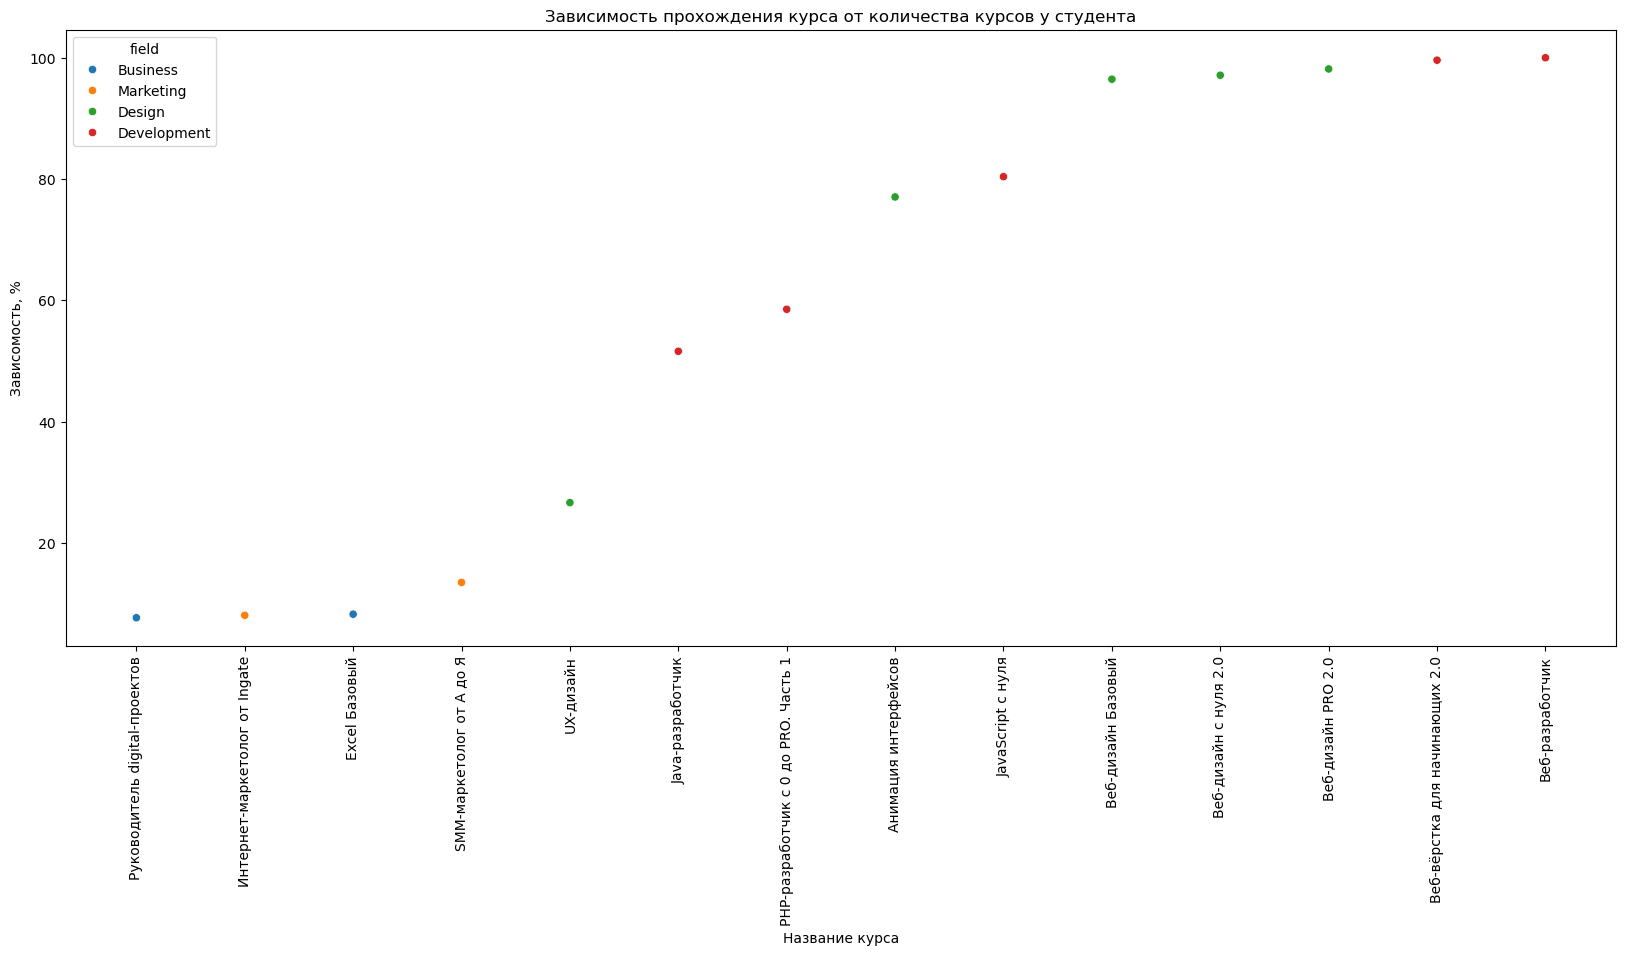

In [63]:
plt.figure(figsize=(20, 8))

ax = sns.scatterplot(data=dependence, x='title', y='dependence', hue='field')
ax.set_title('Зависимость прохождения курса от количества курсов у студента')
ax.set_xlabel('Название курса')
ax.set_ylabel('Зависомость, %')
plt.xticks(rotation = 90)

plt.show()

Вывод: Из графика видно, что наибольшая зависимость прохождения курса от количества курсов у студента, наблюдается у курсов, которые относятся к сфере Development и Design. В этих курсах наибольшее количество модуль и домашних заданий. Из-за длительного прохождения курсов, у студентов теряется мотивация.